<h2>Time Series Forecasting - Part 2: Rose.csv</h2><br>
<h3>Shubhadeep Bhattacharya<br>
Batch: DSBA - Oct 2019<br></h3>

<h2>Part 2 - Wine Sales analysis and forecasting for Rose.csv</h2>

In [1]:
# importing the essential libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3>Question 1. Read the data as an appropriate Time Series data and plot the data.</h3>

In [3]:
# reading the data in the form of a time series
rose_data = pd.read_csv('Rose.csv', parse_dates=True, index_col=0)

In [4]:
rose_data.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Note: The date index assigned is the beginning of each month (format: MS)

In [5]:
rose_data.rename(columns={"Rose": "Rose_Sales"}, inplace=True)

In [6]:
rose_data.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [7]:
rose_data.columns

Index(['Rose_Sales'], dtype='object')

In [8]:
rose_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rose_Sales  185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


Note: Sparkling Sales observations for 187 months (15 years and 7 months), from Jan 1980 to July 1995. 

Note: 2 Missing Values in the dataset

In [9]:
rose_data.isna().sum()

Rose_Sales    2
dtype: int64

In [10]:
rose_data[rose_data['Rose_Sales'].isnull()]

,Rose_Sales
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


In [11]:
## 2 values missing in the year 1994, for months July and August

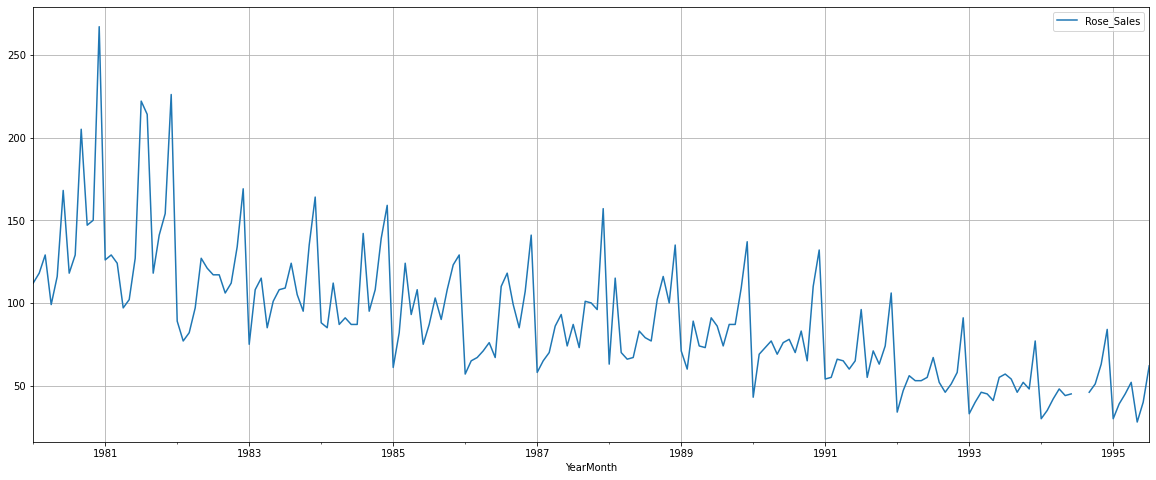

In [12]:
# plotting the entire data set
rose_data.plot(figsize=(20,8))
plt.grid()

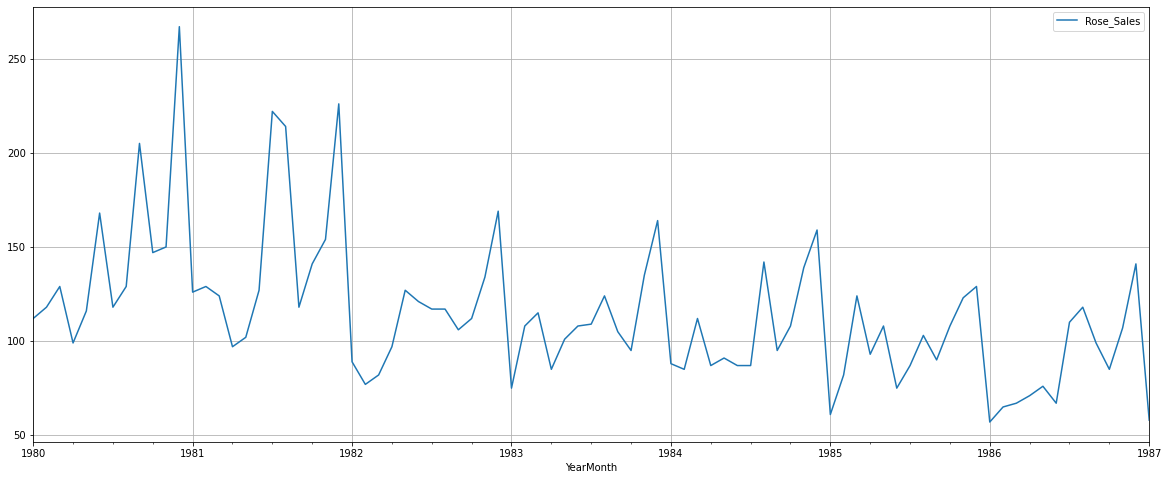

In [13]:
# plotting the first 7 year data to observe the seasonal aspects
rose_data[:85].plot(figsize=(20,8))
plt.grid()

Basic Observations: <br>
There appears to be a generally declining trend in Rose consumption<br>
There is a seasonal pattern, with sales peaking in the last quarter of every year, but it is uneven across years

<h3>Question 2: Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.</h3>

In [14]:
rose_data.head()

,Rose_Sales
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [15]:
rose_data.tail()

,Rose_Sales
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [16]:
rose_data.describe()

,Rose_Sales
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


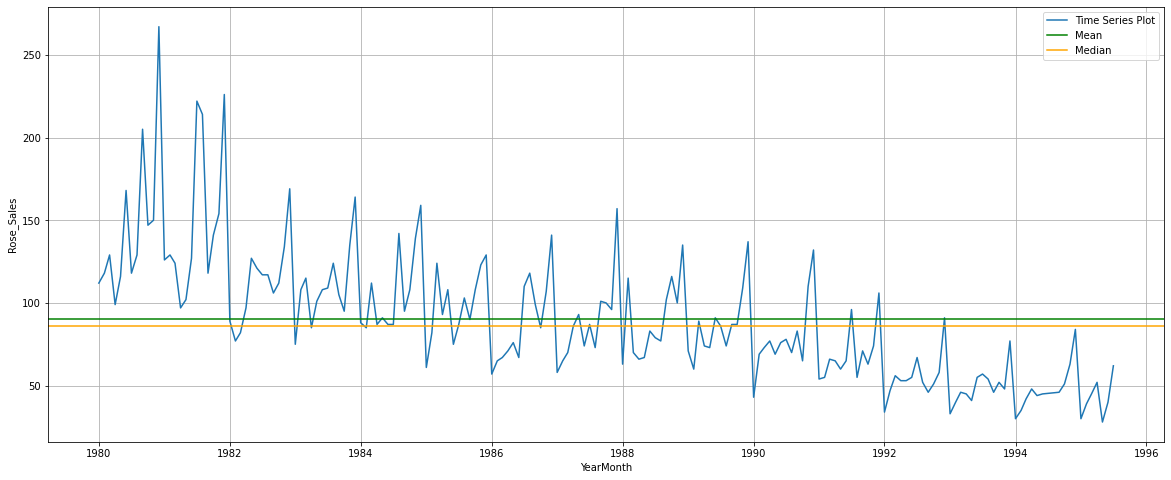

In [17]:
plt.figure(figsize=(20,8))
sns.lineplot(x= rose_data.index, y = rose_data['Rose_Sales'])
plt.axhline(rose_data['Rose_Sales'].mean(),color='Green')
plt.axhline(rose_data['Rose_Sales'].median(),color='Orange')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median'])

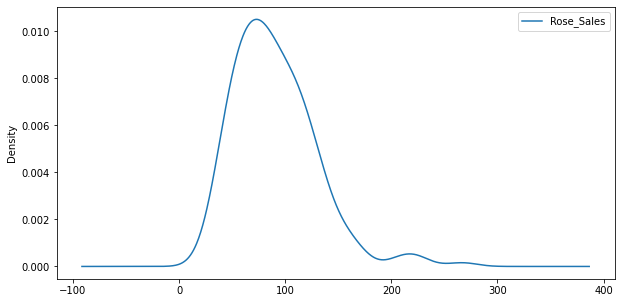

In [18]:
rose_data.plot(kind='kde', figsize=(10,5))

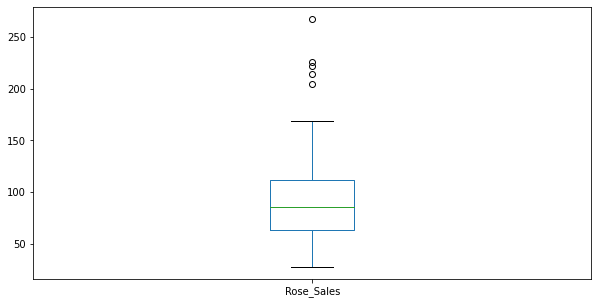

In [19]:
rose_data.plot(kind='box', figsize=(10,5))

In [20]:
# resampling - to aggregate annual sales values
rose_yearly_df = rose_data.resample('A').sum()

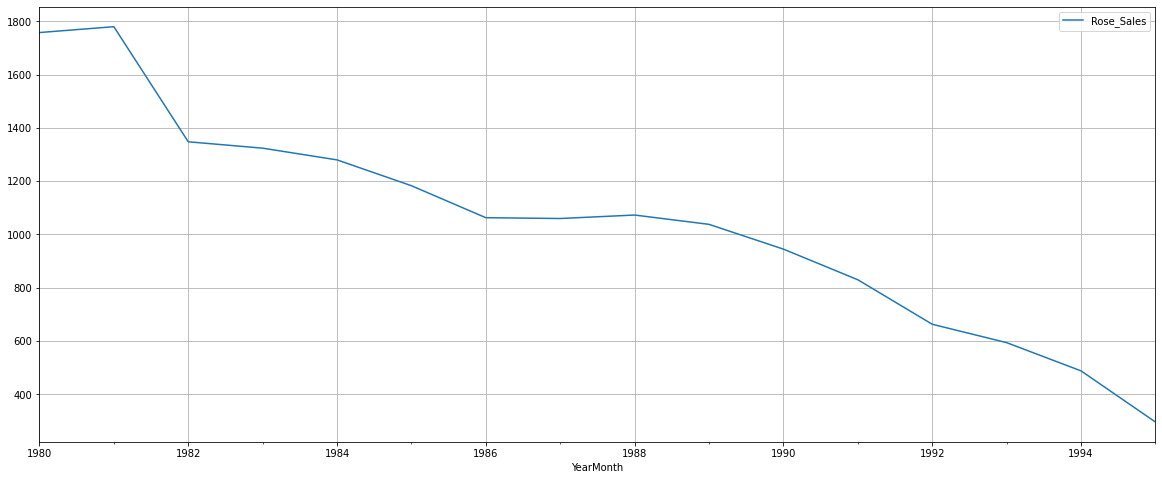

In [21]:
rose_yearly_df.plot(figsize=(20,8))
plt.grid()

In [22]:
rose_quarterly_df = rose_data.resample('Q').sum()

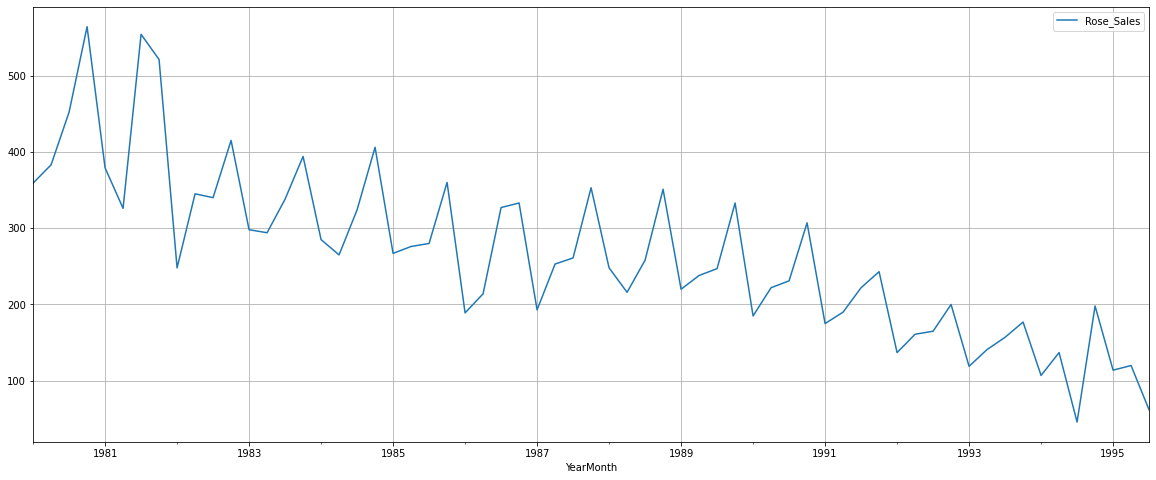

In [23]:
rose_quarterly_df.plot(figsize=(20,8))
plt.grid()

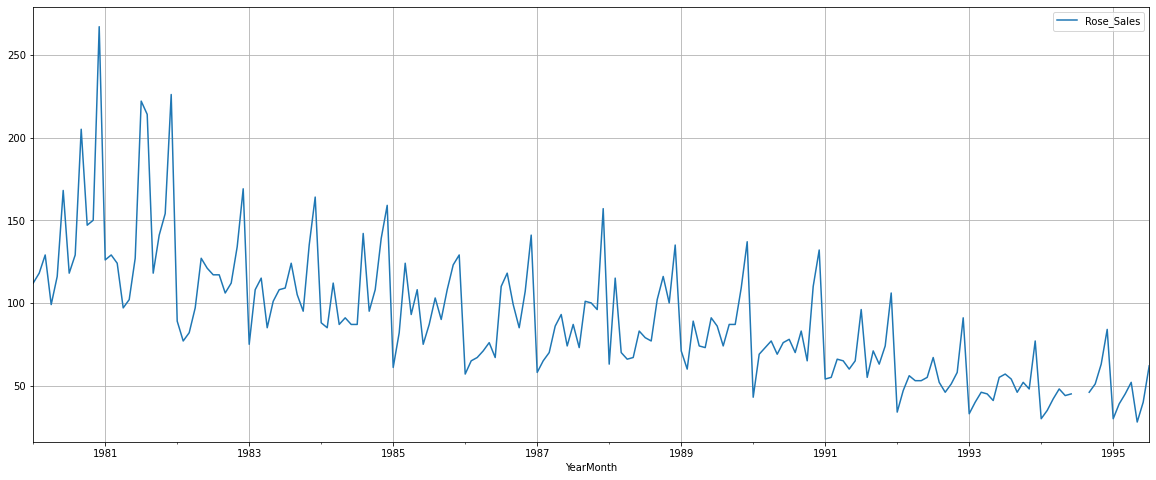

In [24]:
rose_data.plot(figsize=(20,8))
plt.grid()

In [25]:
## visualising the sales patterns using boxplots

In [26]:
rose_data[rose_data.index.month==1]

,Rose_Sales
YearMonth,
1980-01-01,112.0
1981-01-01,126.0
1982-01-01,89.0
1983-01-01,75.0
1984-01-01,88.0
1985-01-01,61.0
1986-01-01,57.0
1987-01-01,58.0
1988-01-01,63.0


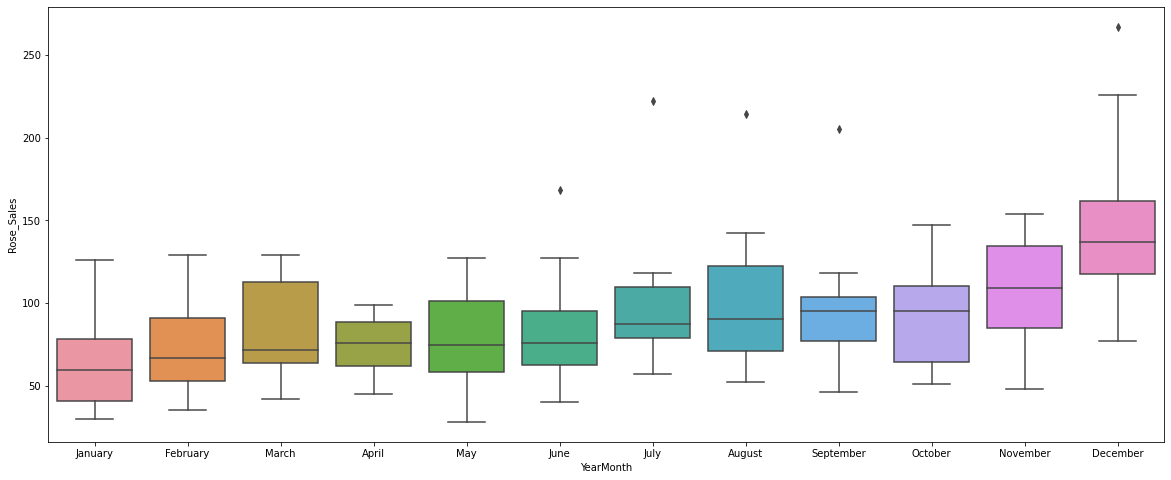

In [27]:
## general monthly pattern
plt.figure(figsize=(20,8))
sns.boxplot(rose_data.index.month_name(), rose_data['Rose_Sales'])

In [28]:
rose_data[rose_data.index.year==1980]

,Rose_Sales
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
1980-06-01,168.0
1980-07-01,118.0
1980-08-01,129.0
1980-09-01,205.0


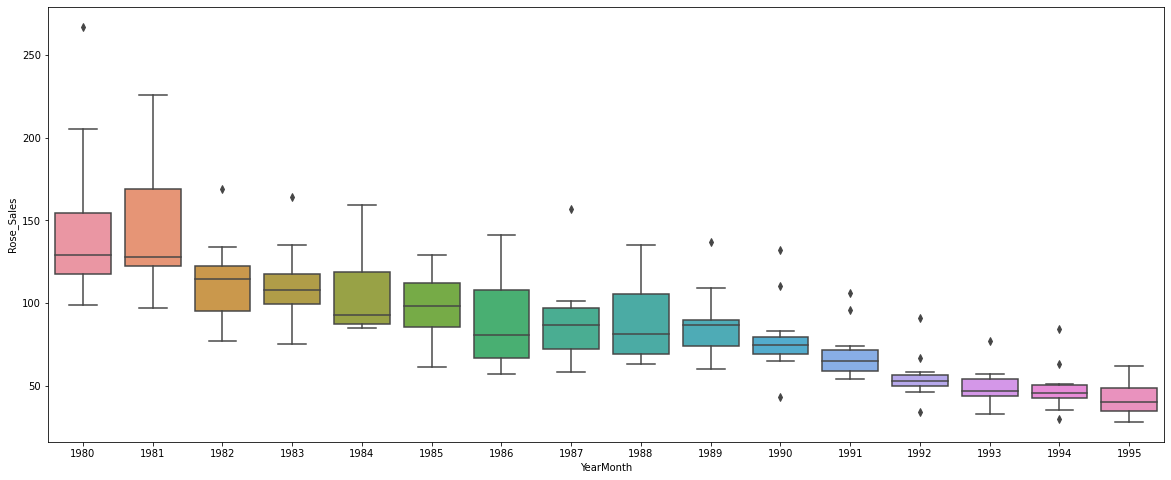

In [29]:
# boxplot of monthly sales, per year
plt.figure(figsize=(20,8))
sns.boxplot(rose_data.index.year, rose_data.Rose_Sales)

In [30]:
## pivot table

In [31]:
## Mapping Sales across months

In [32]:
piv_xm_yy = pd.pivot_table(data=rose_data, values='Rose_Sales', index=rose_data.index.month, columns=rose_data.index.year)

In [33]:
piv_xm_yy

YearMonth,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
YearMonth,,,,,,,,,,,,,,,,
1,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.0,30.0
2,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.0,39.0
3,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.0,45.0
4,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.0,52.0
5,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.0,28.0
6,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.0,40.0
7,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,NaN,62.0
8,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,NaN,NaN
9,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.0,NaN


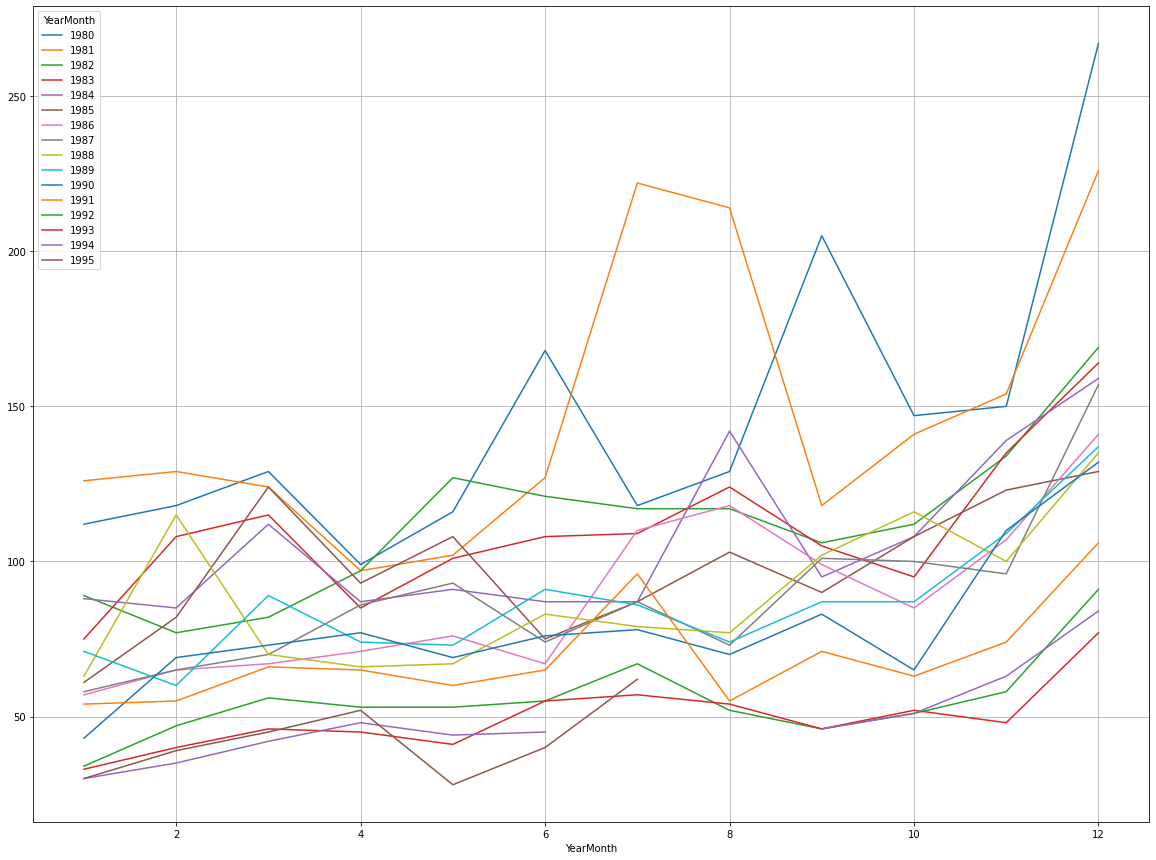

In [34]:
piv_xm_yy.plot(figsize = (20,15))
plt.grid()

In [35]:
## Mapping Sales across quarters

In [36]:
piv_xq_yy = pd.pivot_table(data=rose_data, values='Rose_Sales', index=rose_data.index.quarter, columns=rose_data.index.year)

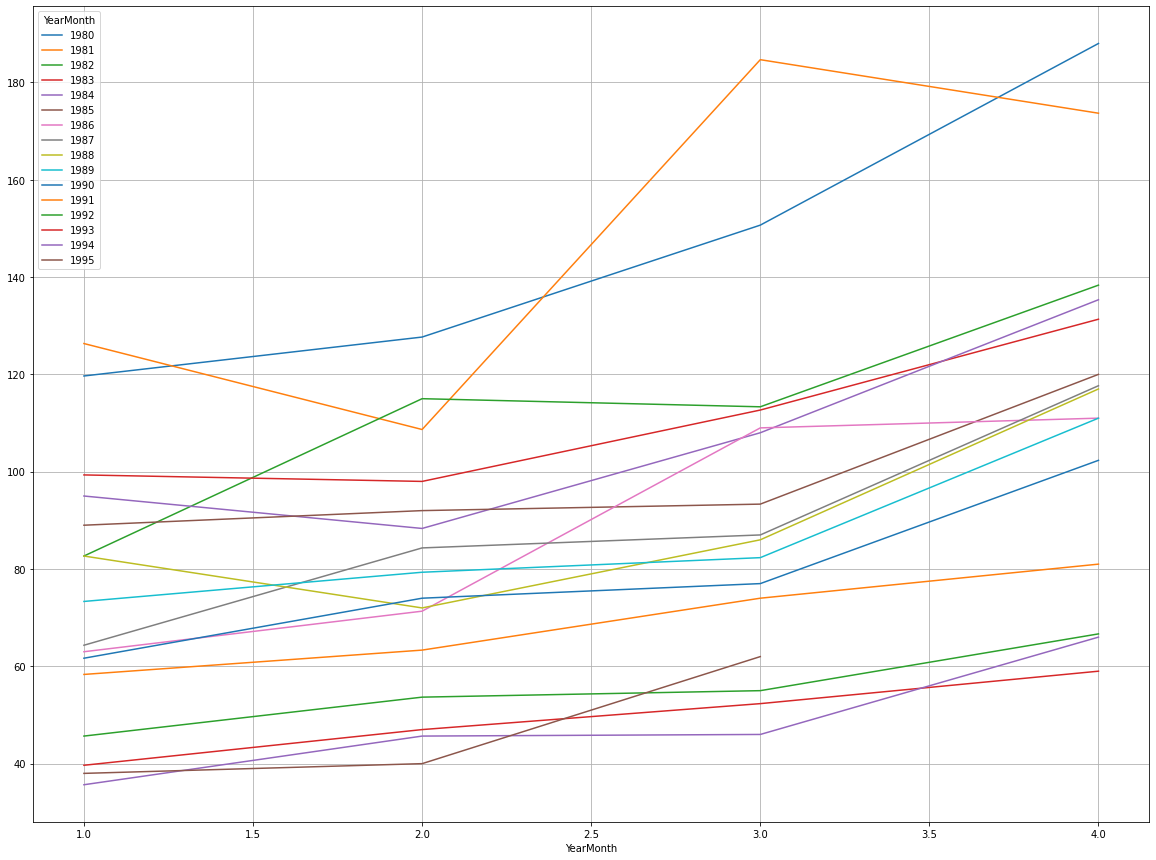

In [37]:
piv_xq_yy.plot(figsize=(20,15))
plt.grid()

In [38]:
## monthly sales across years

In [39]:
monthly_sales_across_years = pd.pivot_table(rose_data, values = 'Rose_Sales', columns = rose_data.index.month_name(), index = rose_data.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


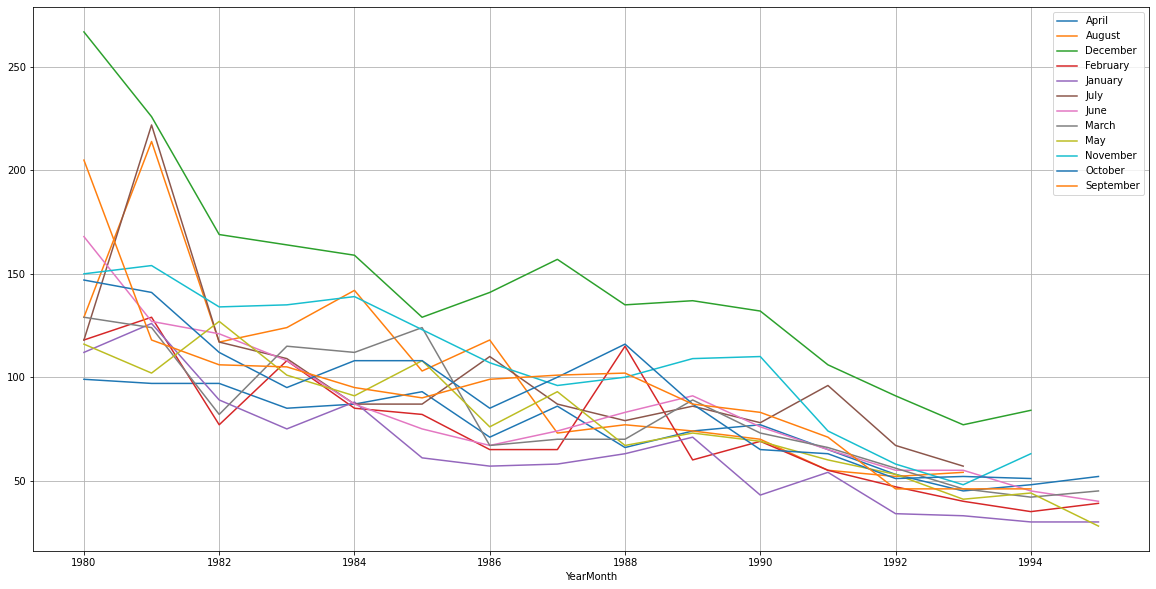

In [40]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [41]:
## Imputing Missing Values

In [42]:
rose_data.isna().sum()

Rose_Sales    2
dtype: int64

In [43]:
rose_data[rose_data['Rose_Sales'].isna()]

,Rose_Sales
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


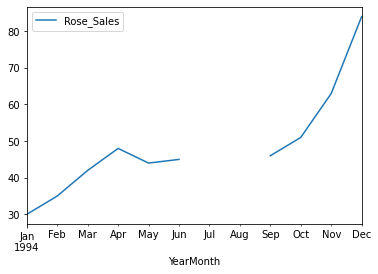

In [44]:
rose_data['1994'].plot()

In [45]:
rose_data['1993-05':'1993-08']

,Rose_Sales
YearMonth,
1993-05-01,41.0
1993-06-01,55.0
1993-07-01,57.0
1993-08-01,54.0


In [46]:
rose_data['1992-05':'1992-08']

,Rose_Sales
YearMonth,
1992-05-01,53.0
1992-06-01,55.0
1992-07-01,67.0
1992-08-01,52.0


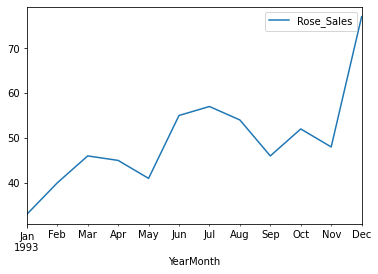

In [47]:
rose_data['1993'].plot()

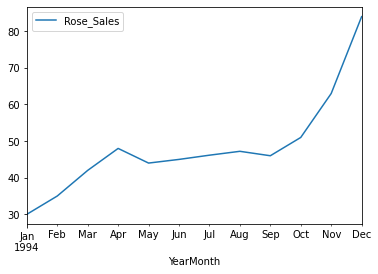

In [48]:
rose_data.interpolate(method='spline',order=1)['1994'].plot()

In [49]:
rose_data = rose_data.interpolate(method='spline',order=1)

In [50]:
rose_data['1994']

,Rose_Sales
YearMonth,
1994-01-01,30.000000
1994-02-01,35.000000
1994-03-01,42.000000
1994-04-01,48.000000
1994-05-01,44.000000
1994-06-01,45.000000
1994-07-01,46.153199
1994-08-01,47.211982
1994-09-01,46.000000


In [51]:
rose_data.isnull().sum()

Rose_Sales    0
dtype: int64

In [52]:
## Decomposition

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1440x576 with 0 Axes>

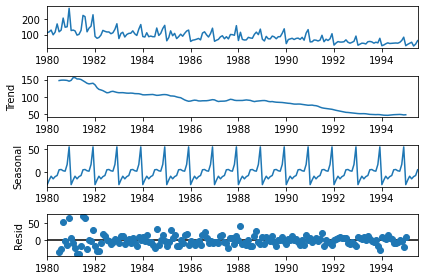

In [54]:
## Additive Seasonality assumption
plt.figure(figsize=(20,8))
decomposition_1 = seasonal_decompose(rose_data,model='additive')
decomposition_1.plot()
plt.show()

In [55]:
decomposition_1.trend[0:20]

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
1981-01-01    147.750000
1981-02-01    155.625000
1981-03-01    155.541667
1981-04-01    151.666667
1981-05-01    151.583333
1981-06-01    150.041667
1981-07-01    146.791667
1981-08-01    143.083333
Name: trend, dtype: float64

In [56]:
decomposition_1.seasonal[0:24]

YearMonth
1980-01-01   -27.921780
1980-02-01   -17.445103
1980-03-01    -9.299901
1980-04-01   -15.112401
1980-05-01   -10.210615
1980-06-01    -7.692758
1980-07-01     4.938434
1980-08-01     5.589575
1980-09-01     2.761554
1980-10-01     1.858776
1980-11-01    16.833776
1980-12-01    55.700443
1981-01-01   -27.921780
1981-02-01   -17.445103
1981-03-01    -9.299901
1981-04-01   -15.112401
1981-05-01   -10.210615
1981-06-01    -7.692758
1981-07-01     4.938434
1981-08-01     5.589575
1981-09-01     2.761554
1981-10-01     1.858776
1981-11-01    16.833776
1981-12-01    55.700443
Name: seasonal, dtype: float64

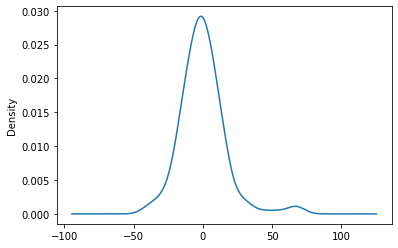

In [57]:
decomposition_1.resid.plot(kind='kde')

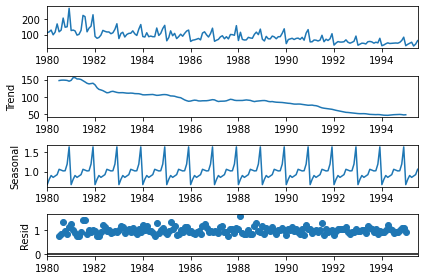

In [58]:
## Multplicative Seasonality Assumption
decomposition_2 = seasonal_decompose(rose_data,model='multiplicative')
decomposition_2.plot()
plt.show()

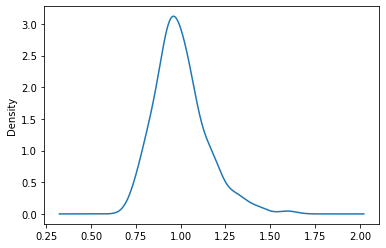

In [59]:
decomposition_2.resid.plot(kind='kde')

In [60]:
decomposition_2.trend[0:20]

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
1981-01-01    147.750000
1981-02-01    155.625000
1981-03-01    155.541667
1981-04-01    151.666667
1981-05-01    151.583333
1981-06-01    150.041667
1981-07-01    146.791667
1981-08-01    143.083333
Name: trend, dtype: float64

In [61]:
decomposition_2.seasonal[:24]

YearMonth
1980-01-01    0.669946
1980-02-01    0.806019
1980-03-01    0.900899
1980-04-01    0.853719
1980-05-01    0.889143
1980-06-01    0.923718
1980-07-01    1.058920
1980-08-01    1.037754
1980-09-01    1.017402
1980-10-01    1.022303
1980-11-01    1.192007
1980-12-01    1.628173
1981-01-01    0.669946
1981-02-01    0.806019
1981-03-01    0.900899
1981-04-01    0.853719
1981-05-01    0.889143
1981-06-01    0.923718
1981-07-01    1.058920
1981-08-01    1.037754
1981-09-01    1.017402
1981-10-01    1.022303
1981-11-01    1.192007
1981-12-01    1.628173
Name: seasonal, dtype: float64

Note: It appears that a multiplicative model is more appropriate for decomposing the dataset

<h3>Question 3. Split the data into training and test. The test data should start in 1991.</h3>

In [62]:
rose_data[:'1990']

,Rose_Sales
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0


In [63]:
rose_data['1991':]

,Rose_Sales
YearMonth,
1991-01-01,54.000000
1991-02-01,55.000000
1991-03-01,66.000000
1991-04-01,65.000000
1991-05-01,60.000000
1991-06-01,65.000000
1991-07-01,96.000000
1991-08-01,55.000000
1991-09-01,71.000000


132 months' data in the training set, and last 55 months' data in the test set

In [64]:
## Split Data into Training and Test datasets. All data for year 1991 and onwards will be in Test data. 

In [65]:
rose_train    =   rose_data[:'1990']
rose_test     =   rose_data['1991':]

In [66]:
rose_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rose_Sales  187 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [67]:
rose_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rose_Sales  132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [68]:
rose_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rose_Sales  55 non-null     float64
dtypes: float64(1)
memory usage: 880.0 bytes


In [69]:
rose_train.tail()

,Rose_Sales
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [70]:
rose_test.head()

,Rose_Sales
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [71]:
rose_test.tail()

,Rose_Sales
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [72]:
## verifying the number of records in the training and test sets
print(rose_train.shape)
print(rose_test.shape)

(132, 1)
(55, 1)


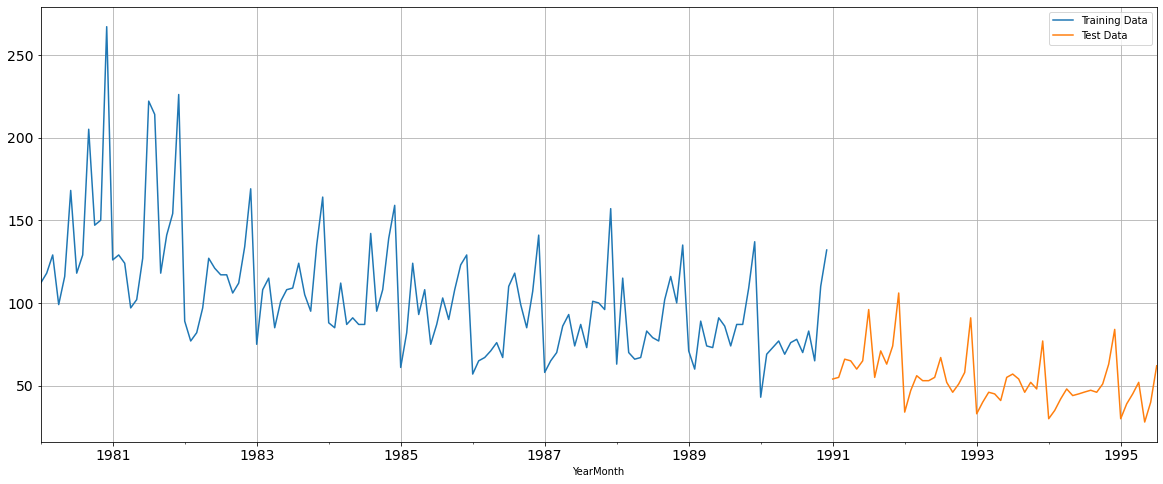

In [73]:
rose_train['Rose_Sales'].plot(figsize=(20,8), fontsize=14)
rose_test['Rose_Sales'].plot(figsize=(20,8), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

<h3>Question 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. <br>Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. - Please do try to build as many models as possible and as many iterations of models as possible with different parameters.</h3>

In [74]:
## MODEL BUILDING - starting with linear regression, naive, moving averages, moving to Exponential Smoothing  models

In [75]:
## Model 1 - Linear Regression

In [76]:
# create a time column for train and test data
train_time = [i+1 for i in range(len(rose_train))]
test_time = [i+133 for i in range(len(rose_test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [77]:
LR_train = rose_train.copy()
LR_test = rose_test.copy()

In [78]:
# attach the timeline column to the train and test sets, for linear regression modeling
LR_train['time'] = train_time
LR_test['time'] = test_time

print('First few rows of Training Data','\n',LR_train.head(),'\n')
print('Last few rows of Training Data','\n',LR_train.tail(),'\n')
print('First few rows of Test Data','\n',LR_test.head(),'\n')
print('Last few rows of Test Data','\n',LR_test.tail(),'\n')

First few rows of Training Data 
             Rose_Sales  time
YearMonth                   
1980-01-01       112.0     1
1980-02-01       118.0     2
1980-03-01       129.0     3
1980-04-01        99.0     4
1980-05-01       116.0     5 

Last few rows of Training Data 
             Rose_Sales  time
YearMonth                   
1990-08-01        70.0   128
1990-09-01        83.0   129
1990-10-01        65.0   130
1990-11-01       110.0   131
1990-12-01       132.0   132 

First few rows of Test Data 
             Rose_Sales  time
YearMonth                   
1991-01-01        54.0   133
1991-02-01        55.0   134
1991-03-01        66.0   135
1991-04-01        65.0   136
1991-05-01        60.0   137 

Last few rows of Test Data 
             Rose_Sales  time
YearMonth                   
1995-03-01        45.0   183
1995-04-01        52.0   184
1995-05-01        28.0   185
1995-06-01        40.0   186
1995-07-01        62.0   187 



In [79]:
# import the required library for a LR model
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()

In [81]:
LR_train.head()

,Rose_Sales,time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


In [82]:
lr.fit(LR_train[['time']],LR_train['Rose_Sales'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
train_predictions_model1_lr = lr.predict(LR_train[['time']])
LR_train['RegOnTime'] = train_predictions_model1_lr


In [84]:
test_predictions_model1_lr = lr.predict(LR_test[['time']])
LR_test['RegOnTime'] = test_predictions_model1_lr


In [85]:
LR_train.head()

,Rose_Sales,time,RegOnTime
YearMonth,,,
1980-01-01,112.0,1,137.321144
1980-02-01,118.0,2,136.826766
1980-03-01,129.0,3,136.332388
1980-04-01,99.0,4,135.838010
1980-05-01,116.0,5,135.343632


In [86]:
LR_test.head()

,Rose_Sales,time,RegOnTime
YearMonth,,,
1991-01-01,54.0,133,72.063266
1991-02-01,55.0,134,71.568888
1991-03-01,66.0,135,71.074511
1991-04-01,65.0,136,70.580133
1991-05-01,60.0,137,70.085755


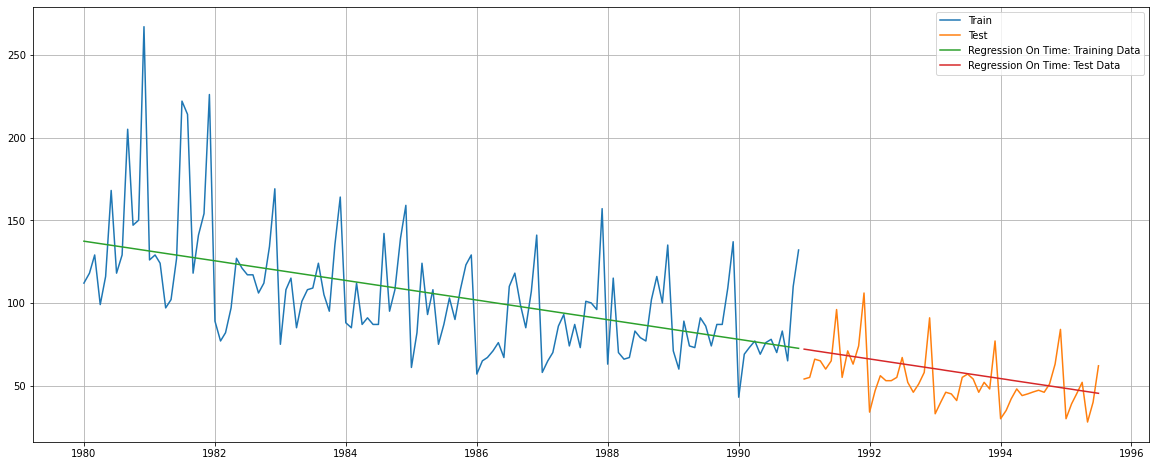

In [87]:
plt.figure(figsize=(20,8))
plt.plot(rose_train['Rose_Sales'], label='Train')
plt.plot(rose_test['Rose_Sales'], label='Test')
plt.plot(LR_train['RegOnTime'], label='Regression On Time: Training Data')
plt.plot(LR_test['RegOnTime'], label='Regression On Time: Test Data')
plt.legend(loc='best')
plt.grid()

In [88]:
## metrics for evaluation

In [89]:
from sklearn import metrics

In [90]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [91]:
## Training Data - RMSE and MAPE

rmse_model1_lr_train = metrics.mean_squared_error(rose_train['Rose_Sales'],train_predictions_model1_lr,squared=False)
mape_model1_lr_train = MAPE(rose_train['Rose_Sales'],train_predictions_model1_lr)
print("For RegressionOnTime forecast on the Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_lr_train, mape_model1_lr_train))

For RegressionOnTime forecast on the Training Data:  RMSE is 30.718 and MAPE is 21.22


In [92]:
## Test Data - RMSE and MAPE

rmse_model1_lr_test = metrics.mean_squared_error(rose_test['Rose_Sales'],test_predictions_model1_lr,squared=False)
mape_model1_lr_test = MAPE(rose_test['Rose_Sales'],test_predictions_model1_lr)
print("For RegressionOnTime forecast on the Test Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_lr_test, mape_model1_lr_test))

For RegressionOnTime forecast on the Test Data:  RMSE is 15.255 and MAPE is 22.72


In [93]:
## tabulating the results, for future comparison and assessment
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_lr_test],'Test MAPE': [mape_model1_lr_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72


In [94]:
## Model 2 - Naive Forecast

In [95]:
NaiveModel_train = rose_train.copy()
NaiveModel_test = rose_test.copy()

In [96]:
np.asarray(rose_train['Rose_Sales'])[len(np.asarray(rose_train['Rose_Sales']))-1]

132.0

In [97]:
## Getting the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(rose_train['Rose_Sales'])[len(np.asarray(rose_train['Rose_Sales']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    132.0
1980-02-01    132.0
1980-03-01    132.0
1980-04-01    132.0
1980-05-01    132.0
Name: naive, dtype: float64

In [98]:
## assigning the same value on test set. 
NaiveModel_test['naive'] = np.asarray(rose_train['Rose_Sales'])[len(np.asarray(rose_train['Rose_Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

In [99]:
NaiveModel_test.head()

,Rose_Sales,naive
YearMonth,,
1991-01-01,54.0,132.0
1991-02-01,55.0,132.0
1991-03-01,66.0,132.0
1991-04-01,65.0,132.0
1991-05-01,60.0,132.0


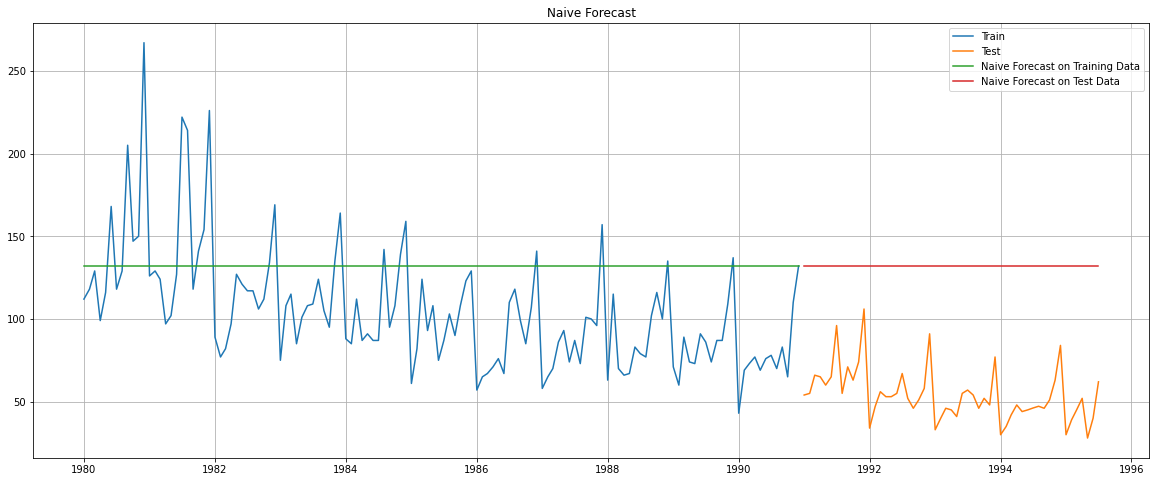

In [100]:
plt.figure(figsize=(20,8))
plt.plot(NaiveModel_train['Rose_Sales'], label='Train')
plt.plot(NaiveModel_test['Rose_Sales'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid()

In [101]:
## model evaluation

In [102]:
## Training Data - RMSE and MAPE

rmse_model2_nm_train = metrics.mean_squared_error(NaiveModel_train['Rose_Sales'],NaiveModel_train['naive'],squared=False)
mape_model2_nm_train = MAPE(NaiveModel_train['Rose_Sales'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_nm_train, mape_model2_nm_train))

For Naive Model forecast on the Training Data:  RMSE is 45.064 and MAPE is 36.38


In [103]:
## Test Data - RMSE and MAPE

rmse_model2_nm_test = metrics.mean_squared_error(NaiveModel_test['Rose_Sales'],NaiveModel_test['naive'],squared=False)
mape_model2_nm_test = MAPE(NaiveModel_test['Rose_Sales'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_nm_test, mape_model2_nm_test))

For RegressionOnTime forecast on the Test Data:  RMSE is 79.672 and MAPE is 144.91


In [104]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_nm_test],'Test MAPE': [mape_model2_nm_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91


In [105]:
## Model 3 - Simple Average

In [106]:
SimpleAverage_train = rose_train.copy()
SimpleAverage_test = rose_test.copy()

In [107]:
## Getting the Mean value of the training set

SimpleAverage_train['Rose_Sales'].mean()

104.93939393939394

In [108]:
SimpleAverage_train['mean_forecast'] = SimpleAverage_train['Rose_Sales'].mean()
SimpleAverage_train.head()

,Rose_Sales,mean_forecast
YearMonth,,
1980-01-01,112.0,104.939394
1980-02-01,118.0,104.939394
1980-03-01,129.0,104.939394
1980-04-01,99.0,104.939394
1980-05-01,116.0,104.939394


In [109]:
SimpleAverage_test['mean_forecast'] = SimpleAverage_train['Rose_Sales'].mean()
SimpleAverage_test.head()

,Rose_Sales,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


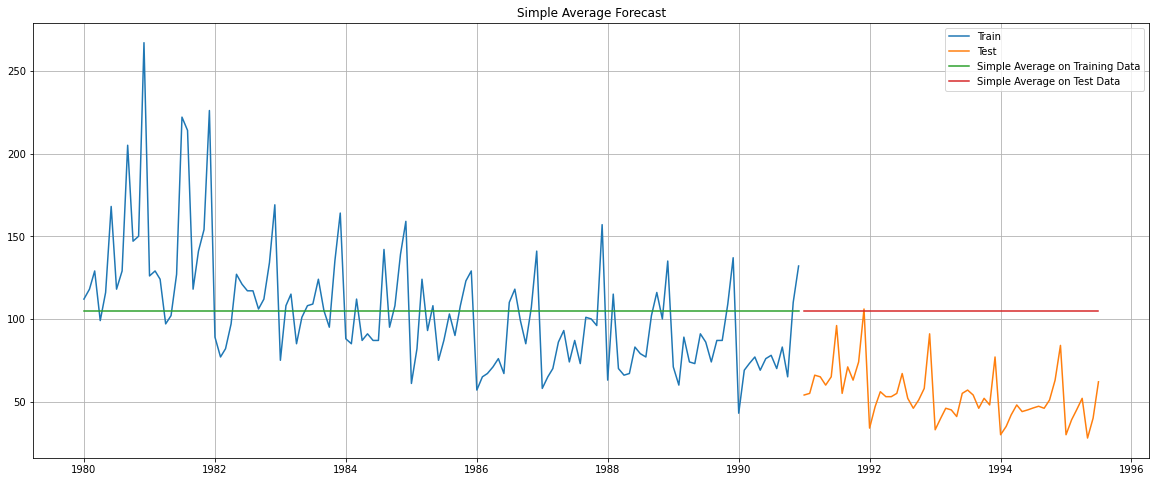

In [110]:
plt.figure(figsize=(20,8))
plt.plot(SimpleAverage_train['Rose_Sales'], label='Train')
plt.plot(SimpleAverage_test['Rose_Sales'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid()

In [111]:
## Training Data - RMSE and MAPE

rmse_model3_sa_train = metrics.mean_squared_error(SimpleAverage_train['Rose_Sales'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_sa_train = MAPE(SimpleAverage_train['Rose_Sales'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_sa_train, mape_model3_sa_train))

For Simple Average Model forecast on the Training Data:  RMSE is 36.034 and MAPE is 25.39


In [112]:
## Test Data - RMSE and MAPE

rmse_model3_sa_test = metrics.mean_squared_error(SimpleAverage_test['Rose_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_sa_test = MAPE(SimpleAverage_test['Rose_Sales'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data: RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_sa_test, mape_model3_sa_test))

For Simple Average forecast on the Test Data: RMSE is 53.413 and MAPE is 94.77


In [113]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_sa_test],'Test MAPE': [mape_model3_sa_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77


In [114]:
## Model 4 - Moving Average/s

In [115]:
## moving averages computed on the entire data set **

In [116]:
MovingAverage = rose_data.copy()
MovingAverage.head()

,Rose_Sales
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [117]:
MovingAverage['Trailing_3'] = MovingAverage['Rose_Sales'].rolling(3).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose_Sales'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Rose_Sales'].rolling(12).mean()

MovingAverage.head()

,Rose_Sales,Trailing_3,Trailing_6,Trailing_9,Trailing_12
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,NaN,NaN,NaN,NaN
1980-03-01,129.0,119.666667,NaN,NaN,NaN
1980-04-01,99.0,115.333333,NaN,NaN,NaN
1980-05-01,116.0,114.666667,NaN,NaN,NaN


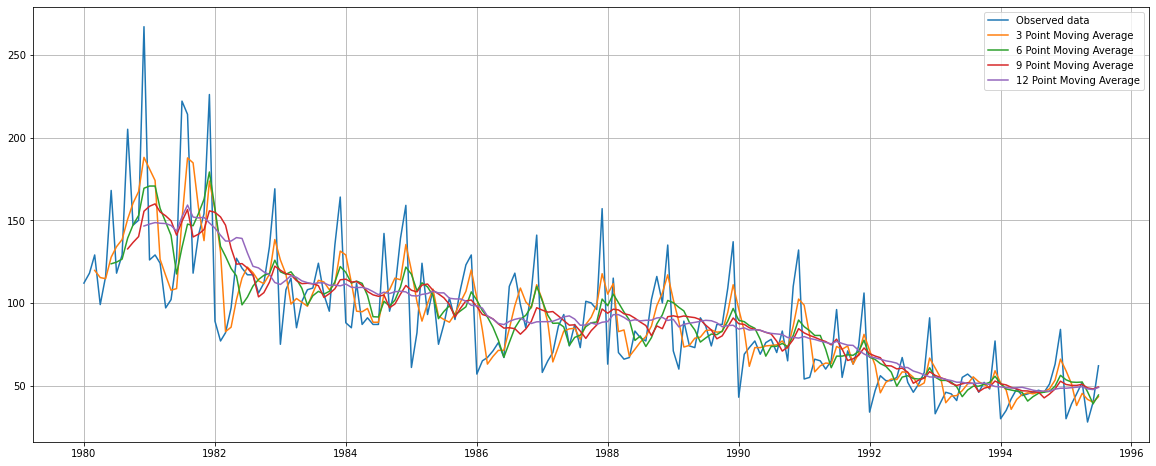

In [118]:
## Plotting the whole data

plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Rose_Sales'], label='Observed data')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()

In [119]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[:'1990']
trailing_MovingAverage_test=MovingAverage['1991':]


In [120]:
trailing_MovingAverage_test.tail()

,Rose_Sales,Trailing_3,Trailing_6,Trailing_9,Trailing_12
YearMonth,,,,,
1995-03-01,45.0,38.000000,52.000000,50.151687,49.030432
1995-04-01,52.0,45.333333,52.166667,50.801331,49.363765
1995-05-01,28.0,41.666667,46.333333,48.666667,48.030432
1995-06-01,40.0,40.000000,39.000000,48.000000,47.613765
1995-07-01,62.0,43.333333,44.333333,49.222222,48.934332


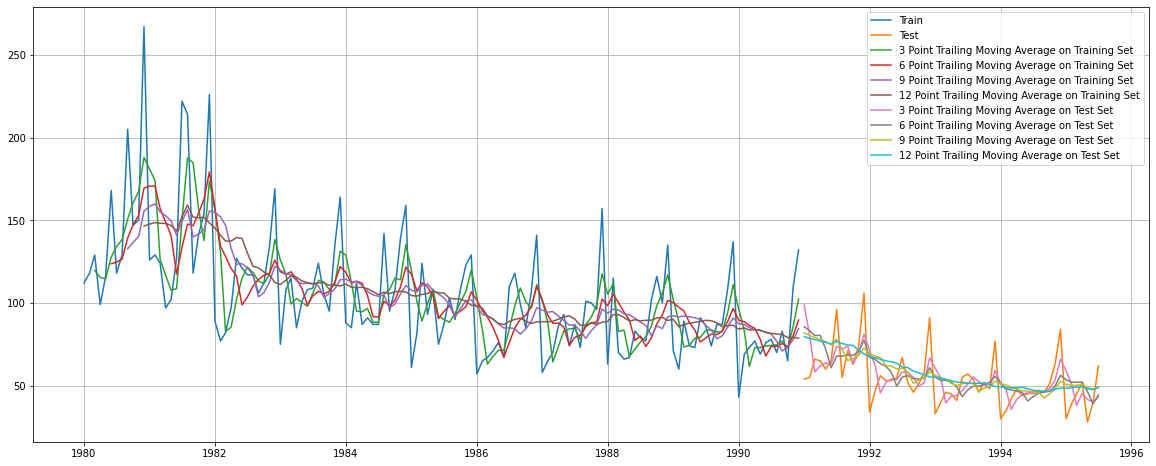

In [121]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(trailing_MovingAverage_train['Rose_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose_Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'], label='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_12'],label = '12 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_12'],label = '12 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid()

In [122]:
## evaluating on the Test data

In [123]:
## Test Data - RMSE and MAPE --> 3 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(trailing_MovingAverage_test['Rose_Sales'],trailing_MovingAverage_test['Trailing_3'],squared=False)
mape_model4_test_3 = MAPE(trailing_MovingAverage_test['Rose_Sales'],trailing_MovingAverage_test['Trailing_3'])
print("For 3 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_3, mape_model4_test_3))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(trailing_MovingAverage_test['Rose_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(trailing_MovingAverage_test['Rose_Sales'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(trailing_MovingAverage_test['Rose_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(trailing_MovingAverage_test['Rose_Sales'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

## Test Data - RMSE and MAPE --> 12 point Trailing MA

rmse_model4_test_12 = metrics.mean_squared_error(trailing_MovingAverage_test['Rose_Sales'],trailing_MovingAverage_test['Trailing_12'],squared=False)
mape_model4_test_12 = MAPE(trailing_MovingAverage_test['Rose_Sales'],trailing_MovingAverage_test['Trailing_12'])
print("For 12 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_12, mape_model4_test_12))

For 3 point Moving Average Model forecast on the Test Data,  RMSE is 14.126 and MAPE is 18.31
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.555 and MAPE is 20.82
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 14.722 and MAPE is 20.99
For 12 point Moving Average Model forecast on the Test Data,  RMSE is 15.233 and MAPE is 22.03


In [124]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_3,rmse_model4_test_6
                                          ,rmse_model4_test_9,rmse_model4_test_12]
                            ,'Test MAPE': [mape_model4_test_3,mape_model4_test_6,mape_model4_test_9
                                           ,mape_model4_test_12]}
                           ,index=['3pointTrailingMovingAverage','6pointTrailingMovingAverage'
                                   ,'9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03


In [125]:
## Comparing the models so far

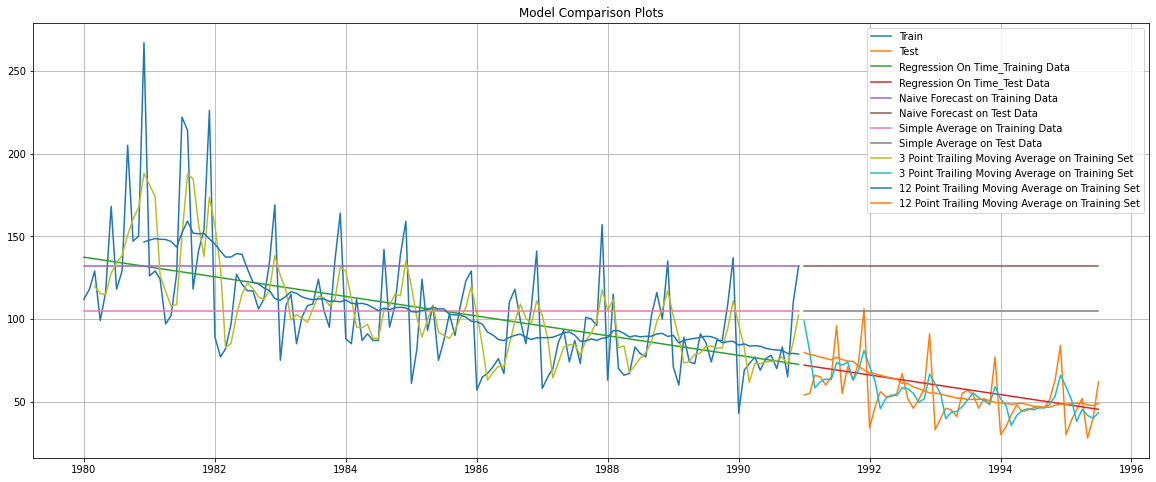

In [126]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,8))
plt.plot(rose_train['Rose_Sales'], label='Train')
plt.plot(rose_test['Rose_Sales'], label='Test')

plt.plot(LR_train['RegOnTime'], label='Regression On Time_Training Data')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_train['Trailing_12'], label='12 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_12'], label='12 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid()

In [127]:
## EXPONENTIAL SMOOTHING

In [128]:
# importing the required libraries for exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [129]:
## Method 5: SINGLE EXPONENTIAL SMOOTHING

In [130]:
SES_train = rose_train.copy()
SES_test = rose_test.copy()

In [131]:
## SES - AUTO FIT

In [132]:
model_SES = SimpleExpSmoothing(SES_train['Rose_Sales'])

In [133]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [134]:
model_SES_autofit.params

{'smoothing_level': 0.09875003987520162,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38712015111975,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [135]:
SES_train['predicted'] = model_SES_autofit.fittedvalues
SES_train.head()

,Rose_Sales,predicted
YearMonth,,
1980-01-01,112.0,134.387120
1980-02-01,118.0,132.176391
1980-03-01,129.0,130.776472
1980-04-01,99.0,130.601045
1980-05-01,116.0,127.480441


In [136]:
len(SES_test)

55

In [137]:
SES_test['predicted'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

,Rose_Sales,predicted
YearMonth,,
1991-01-01,54.0,87.105003
1991-02-01,55.0,87.105003
1991-03-01,66.0,87.105003
1991-04-01,65.0,87.105003
1991-05-01,60.0,87.105003


In [138]:
SES_test.tail()

,Rose_Sales,predicted
YearMonth,,
1995-03-01,45.0,87.105003
1995-04-01,52.0,87.105003
1995-05-01,28.0,87.105003
1995-06-01,40.0,87.105003
1995-07-01,62.0,87.105003


Text(0.5, 1.0, 'Alpha = 0.099 Predictions')

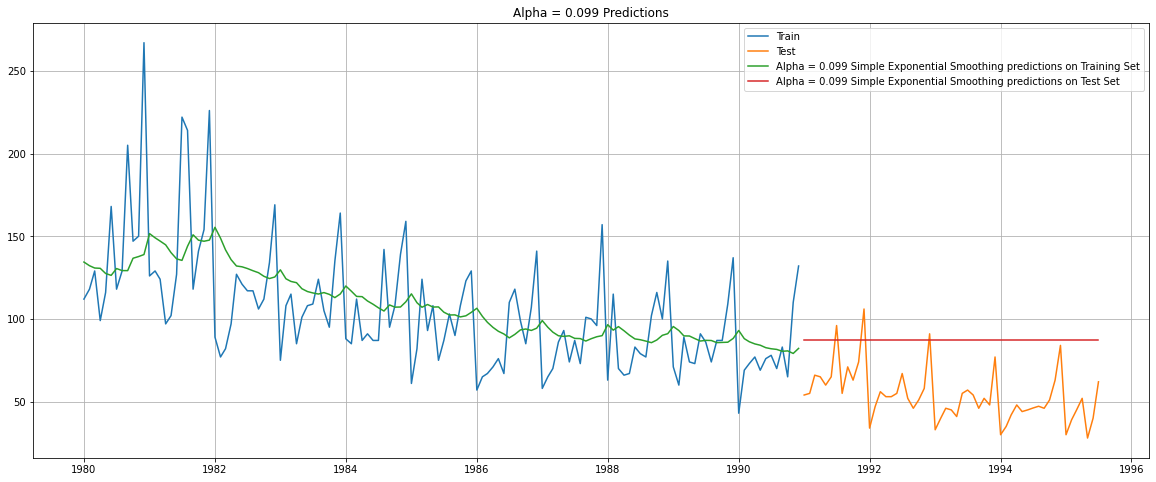

In [139]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Rose_Sales'], label='Train')
plt.plot(SES_test['Rose_Sales'], label='Test')

plt.plot(SES_train['predicted'], label='Alpha = 0.099 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predicted'], label='Alpha = 0.099 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.099 Predictions')

In [140]:
## Model Evaluation for alpha = 0.099 : Simple Exponential Smoothing

In [141]:
## Training Data

rmse_model5_ses_train_1 = metrics.mean_squared_error(SES_train['Rose_Sales'],SES_train['predicted'],squared=False)
mape_model5_ses_train_1 = MAPE(SES_train['Rose_Sales'],SES_train['predicted'])
print("For Alpha = 0.099 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_ses_train_1, mape_model5_ses_train_1))

For Alpha = 0.099 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is 31.501 and MAPE is 22.73


In [142]:
## Test Data

rmse_model5_ses_test_1 = metrics.mean_squared_error(SES_test['Rose_Sales'],SES_test['predicted'],squared=False)
mape_model5_ses_test_1 = MAPE(SES_test['Rose_Sales'],SES_test['predicted'])
print("For Alpha = 0.099 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_ses_test_1, mape_model5_ses_test_1))


For Alpha = 0.099 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is 36.748 and MAPE is 63.75


In [143]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [rmse_model5_ses_test_1],'Test MAPE': [mape_model5_ses_test_1]}
                           ,index=['Alpha=0.099,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75


In [144]:
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75


In [145]:
## SES with multiple Alpha value options: running a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [146]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_5_2 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_5_2

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [147]:
for i in np.arange(0,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_2_train_i = metrics.mean_squared_error(SES_train['Rose_Sales'],SES_train['predict',i],squared=False)
    mape_model5_2_train_i = MAPE(SES_train['Rose_Sales'],SES_train['predict',i])
    
    rmse_model5_2_test_i = metrics.mean_squared_error(SES_test['Rose_Sales'],SES_test['predict',i],squared=False)
    mape_model5_2_test_i = MAPE(SES_test['Rose_Sales'],SES_test['predict',i])
    
    resultsDf_5_2 = resultsDf_5_2.append({'Alpha Values':i,'Train RMSE':rmse_model5_2_train_i 
                                      ,'Train MAPE': mape_model5_2_train_i,'Test RMSE':rmse_model5_2_test_i
                                      ,'Test MAPE':mape_model5_2_test_i}, ignore_index=True)

In [148]:
## Model Evaluation

In [149]:
resultsDf_5_2

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.0,36.034234,25.39,53.413316,94.77
1,0.1,31.501015,22.71,36.780213,63.81
2,0.2,31.898670,22.24,41.314129,72.07
3,0.3,32.448833,22.31,47.457298,83.56
4,0.4,33.028400,22.51,53.720147,95.35
5,0.5,33.680192,22.69,59.594772,106.64
6,0.6,34.439946,22.89,64.924484,116.87
7,0.7,35.322683,23.09,69.651533,125.89
8,0.8,36.334371,23.42,73.727504,133.64
9,0.9,37.482735,23.93,77.092898,140.02


In [150]:
# sorting the table in ascending order of Test RMSE
resultsDf_5_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
1,0.1,31.501015,22.71,36.780213,63.81
2,0.2,31.898670,22.24,41.314129,72.07
3,0.3,32.448833,22.31,47.457298,83.56
0,0.0,36.034234,25.39,53.413316,94.77
4,0.4,33.028400,22.51,53.720147,95.35


In [151]:
SES_test['predict', 0.1].head()

YearMonth
1991-01-01    87.140197
1991-02-01    87.140197
1991-03-01    87.140197
1991-04-01    87.140197
1991-05-01    87.140197
Name: (predict, 0.1), dtype: float64

The two lowest RMSE scores are for alpha values 0.1 and 0.2

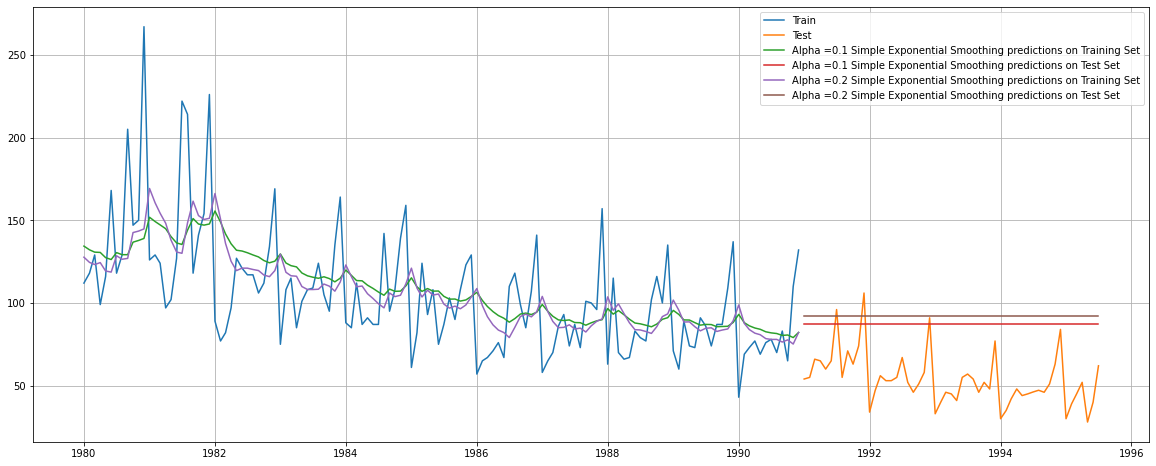

In [152]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Rose_Sales'], label='Train')
plt.plot(SES_test['Rose_Sales'], label='Test')

plt.plot(SES_train['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()

In [153]:
## adding the scores of options with alpha 0.1 and 0.2 to the results table

resultsDf_5_cons = pd.DataFrame({'Test RMSE': [resultsDf_5_2['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_5_2['Test MAPE'][1]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5_cons])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75
"Alpha=0.1,SimpleExponentialSmoothing",36.780213,63.81


In [154]:
## Method 6: Double Exponential Smoothing (Holt's Model)

## Two parameters alpha and beta are estimated in this model. Level and Trend are accounted for in this model.

In [155]:
DES_train = rose_train.copy()
DES_test = rose_test.copy()

In [156]:
model_DES = Holt(DES_train['Rose_Sales'])

In [157]:
## Autofit DES 

In [158]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [159]:
model_DES_autofit.params

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [160]:
DES_train['predicted'] = model_DES_autofit.fittedvalues
DES_train.head()

,Rose_Sales,predicted
YearMonth,,
1980-01-01,112.0,118.000000
1980-02-01,118.0,122.903047
1980-03-01,129.0,127.857061
1980-04-01,99.0,133.794198
1980-05-01,116.0,133.189605


In [161]:
len(DES_test)

55

In [162]:
DES_test['predicted'] = model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

,Rose_Sales,predicted
YearMonth,,
1991-01-01,54.0,86.863579
1991-02-01,55.0,88.028056
1991-03-01,66.0,89.192534
1991-04-01,65.0,90.357011
1991-05-01,60.0,91.521488


In [163]:
DES_test.tail()

,Rose_Sales,predicted
YearMonth,,
1995-03-01,45.0,145.087450
1995-04-01,52.0,146.251928
1995-05-01,28.0,147.416405
1995-06-01,40.0,148.580883
1995-07-01,62.0,149.745360


Text(0.5, 1.0, 'Alpha = 0.16, Beta = 0.16 Predictions')

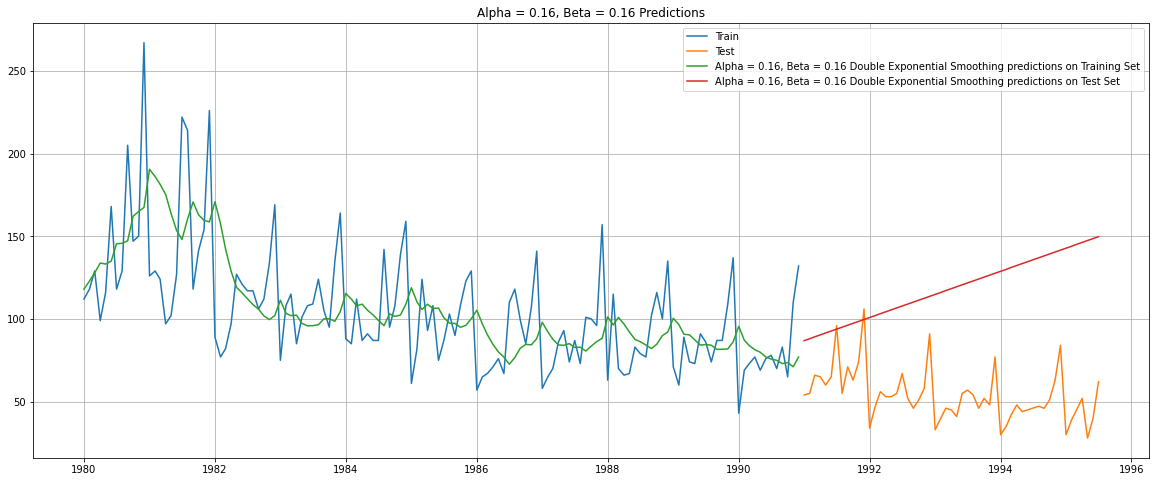

In [164]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(DES_train['Rose_Sales'], label='Train')
plt.plot(DES_test['Rose_Sales'], label='Test')

plt.plot(DES_train['predicted'], label='Alpha = 0.16, Beta = 0.16 Double Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['predicted'], label='Alpha = 0.16, Beta = 0.16 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.16, Beta = 0.16 Predictions')

In [165]:
## Model Evaluation for alpha = 0.16 beta = 0.16 : Double Exponential Smoothing

In [166]:
## Training Data

rmse_model6_des_train_1 = metrics.mean_squared_error(DES_train['Rose_Sales'],DES_train['predicted'],squared=False)
mape_model6_des_train_1 = MAPE(DES_train['Rose_Sales'],DES_train['predicted'])
print("For Alpha = 0.16, Beta = 0.16 Double Exponential Smoothing Model forecast on the Training Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model6_des_train_1, mape_model6_des_train_1))


For Alpha = 0.16, Beta = 0.16 Double Exponential Smoothing Model forecast on the Training Data, RMSE is 33.075 and MAPE is 23.99


In [167]:
## Test Data

rmse_model6_des_test_1 = metrics.mean_squared_error(DES_test['Rose_Sales'],DES_test['predicted'],squared=False)
mape_model6_des_test_1 = MAPE(DES_test['Rose_Sales'],DES_test['predicted'])
print("For Alpha = 0.16, Beta = 0.16 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model6_des_test_1, mape_model6_des_test_1))


For Alpha = 0.16, Beta = 0.16 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 70.517 and MAPE is 120.07


In [168]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_des_test_1],'Test MAPE': [mape_model6_des_test_1]}
                           ,index=['Alpha=0.16,Beta=0.16,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75
"Alpha=0.1,SimpleExponentialSmoothing",36.780213,63.81
"Alpha=0.16,Beta=0.16,DoubleExponentialSmoothing",70.517385,120.07


In [169]:
## DES with multiple alpha and beta values: running a loop with different alpha, beta values to understand which particular value works best for alpha on the test set.

In [170]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_3 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6_3

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [171]:
## using alpha and beta options from 0.1 to 1

In [172]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_3_train = metrics.mean_squared_error(DES_train['Rose_Sales'],DES_train['predict',i,j],squared=False)
        mape_model6_3_train = MAPE(DES_train['Rose_Sales'],DES_train['predict',i,j])
        
        rmse_model6_3_test = metrics.mean_squared_error(DES_test['Rose_Sales'],DES_test['predict',i,j],squared=False)
        mape_model6_3_test = MAPE(DES_test['Rose_Sales'],DES_test['predict',i,j])
        
        resultsDf_6_3 = resultsDf_6_3.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_3_train
                                      ,'Train MAPE': mape_model6_3_train,'Test RMSE':rmse_model6_3_test
                                      ,'Test MAPE':mape_model6_3_test}, ignore_index=True)

In [173]:
resultsDf_6_3

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,32.026565,22.78,37.007705,63.89
1,0.1,0.2,33.450729,24.45,48.634943,82.94
2,0.1,0.3,33.145789,24.46,78.100383,131.06
3,0.1,0.4,33.262191,24.68,99.526502,165.32
4,0.1,0.5,33.688415,24.92,124.212282,205.17
...,...,...,...,...,...,...
95,1.0,0.6,51.828562,34.61,801.622524,1322.72
96,1.0,0.7,54.493671,36.36,841.834847,1387.68
97,1.0,0.8,57.362069,38.19,853.907801,1407.19
98,1.0,0.9,60.470112,40.12,834.653214,1376.08


Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [174]:
resultsDf_6_3.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,32.026565,22.78,37.007705,63.89
1,0.1,0.2,33.450729,24.45,48.634943,82.94
10,0.2,0.1,32.796403,23.06,65.677696,113.03
2,0.1,0.3,33.145789,24.46,78.100383,131.06
20,0.3,0.1,33.528397,23.47,98.598321,169.90


In [175]:
resultsDf_6_3.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,32.026565,22.78,37.007705,63.89
1,0.1,0.2,33.450729,24.45,48.634943,82.94
10,0.2,0.1,32.796403,23.06,65.677696,113.03
2,0.1,0.3,33.145789,24.46,78.100383,131.06
3,0.1,0.4,33.262191,24.68,99.526502,165.32


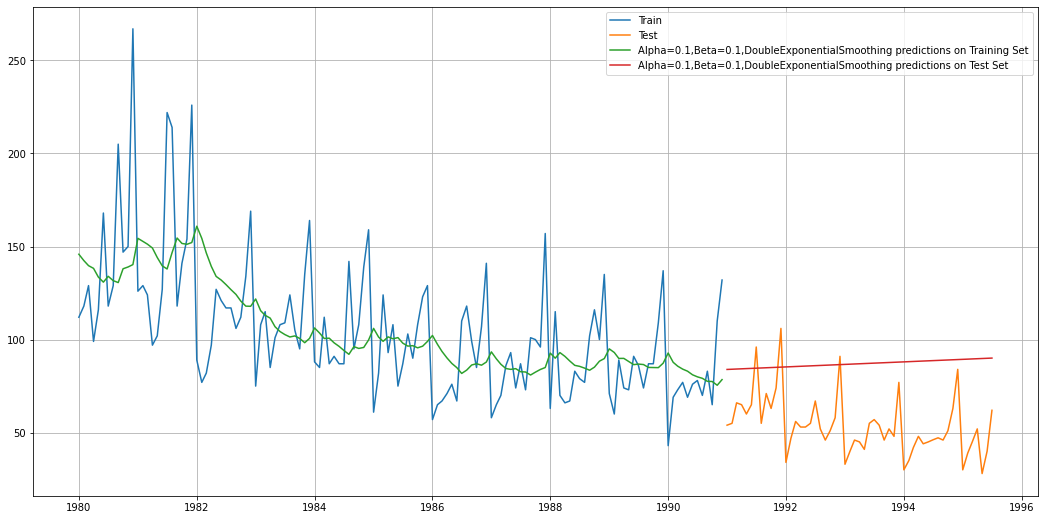

In [176]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose_Sales'], label='Train')
plt.plot(DES_test['Rose_Sales'], label='Test')

plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()

In [177]:
resultsDf_6_3['Test RMSE'][0]

37.00770534632265

In [178]:
resultsDf_6_cons = pd.DataFrame({'Test RMSE': [resultsDf_6_3['Test RMSE'][0]],'Test MAPE':[resultsDf_6_3['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_cons])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75
"Alpha=0.1,SimpleExponentialSmoothing",36.780213,63.81
"Alpha=0.16,Beta=0.16,DoubleExponentialSmoothing",70.517385,120.07


In [179]:
## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

## Three parameters alpha, beta and gamma are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [180]:
TES_train = rose_train.copy()
TES_test = rose_test.copy()

In [181]:
TES_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rose_Sales  55 non-null     float64
dtypes: float64(1)
memory usage: 880.0 bytes


In [182]:
## TES - Auto Fit; we've observed multiplicative seasonal during decomposition

In [183]:
model_TES = ExponentialSmoothing(TES_train['Rose_Sales'],trend='additive',seasonal='multiplicative')

In [184]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [185]:
model_TES_autofit.params

{'smoothing_level': 0.10609644694859706,
 'smoothing_slope': 0.0484383791790911,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565120412202,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550185, 1.65927049, 1.80572542, 1.58888737, 1.77822611,
        1.92604252, 2.11649342, 2.25135081, 2.11690451, 2.08112715,
        2.4092713 , 3.30447926]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [186]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose_Sales,auto_predict
YearMonth,,
1980-01-01,112.0,113.105555
1980-02-01,118.0,127.054167
1980-03-01,129.0,137.165564
1980-04-01,99.0,119.844322
1980-05-01,116.0,131.432526


In [187]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

,Rose_Sales,auto_predict
YearMonth,,
1991-01-01,54.0,56.674336
1991-02-01,55.0,63.471272
1991-03-01,66.0,68.788790
1991-04-01,65.0,60.277826
1991-05-01,60.0,67.180380


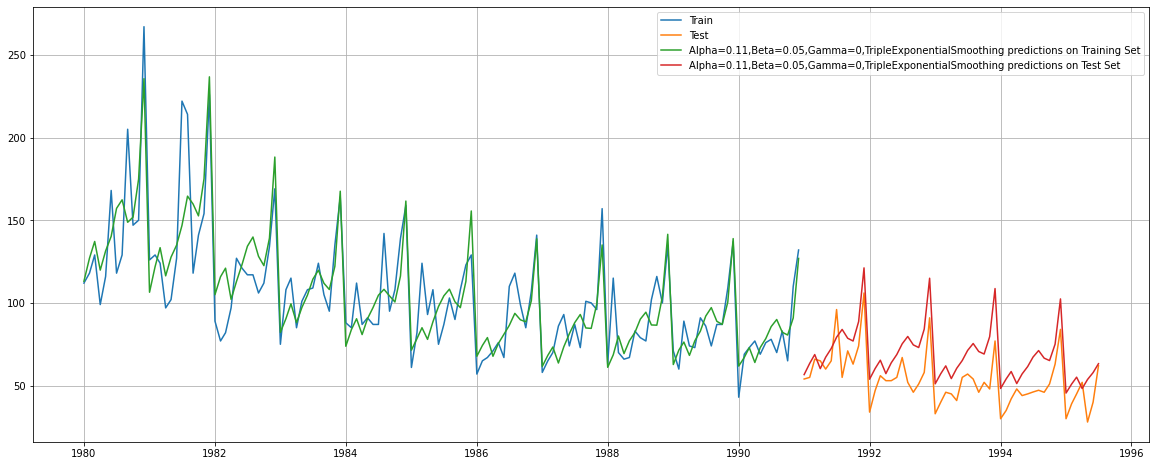

In [188]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(20,8))
plt.plot(TES_train['Rose_Sales'], label='Train')
plt.plot(TES_test['Rose_Sales'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.11,Beta=0.05,Gamma=0,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.11,Beta=0.05,Gamma=0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [189]:
## Training Data

rmse_model7_tes_train_1 = metrics.mean_squared_error(TES_train['Rose_Sales'],TES_train['auto_predict'],squared=False)
mape_model7_tes_train_1 = MAPE(TES_train['Rose_Sales'],TES_train['auto_predict'])
print("For Alpha: 0.11, Beta: 0.05 and Gamma: 0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_tes_train_1, mape_model7_tes_train_1))

For Alpha: 0.11, Beta: 0.05 and Gamma: 0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 18.579 MAPE is 13.21


In [190]:
## Test Data

rmse_model7_tes_test_1 = metrics.mean_squared_error(TES_test['Rose_Sales'],TES_test['auto_predict'],squared=False)
mape_model7_tes_test_1 = MAPE(TES_test['Rose_Sales'],TES_test['auto_predict'])
print("For Alpha: 0.11, Beta: 0.05 and Gamma: 0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_tes_test_1, mape_model7_tes_test_1))

For Alpha: 0.11, Beta: 0.05 and Gamma: 0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.311 MAPE is 28.78


In [191]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model7_tes_test_1],'Test MAPE':[mape_model7_tes_test_1]}
                           ,index=['Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75
"Alpha=0.1,SimpleExponentialSmoothing",36.780213,63.81
"Alpha=0.16,Beta=0.16,DoubleExponentialSmoothing",70.517385,120.07


In [192]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [193]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model7_2_train = metrics.mean_squared_error(TES_train['Rose_Sales'],TES_train['predict',i,j,k],squared=False)
            mape_model7_2_train = MAPE(TES_train['Rose_Sales'],TES_train['predict',i,j,k])
        
            rmse_model7_2_test = metrics.mean_squared_error(TES_test['Rose_Sales'],TES_test['predict',i,j,k],squared=False)
            mape_model7_2_test = MAPE(TES_test['Rose_Sales'],TES_test['predict',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model7_2_train
                                      ,'Train MAPE': mape_model7_2_train,'Test RMSE':rmse_model7_2_test
                                      ,'Test MAPE':mape_model7_2_test}, ignore_index=True)
            

In [194]:
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.0,0.1,26.976365,17.18,39.259611,66.12
1,0.1,0.0,0.2,25.171098,16.19,37.335095,63.38
2,0.1,0.0,0.3,24.380627,15.88,36.254737,61.41
3,0.1,0.0,0.4,24.076778,15.77,35.457076,59.83
4,0.1,0.0,0.5,24.072446,15.68,34.819035,58.50
...,...,...,...,...,...,...,...
1095,1.0,1.0,0.6,28358.458519,3085.88,9603.625727,7806.55
1096,1.0,1.0,0.7,30724.126331,4617.55,23029.955195,11826.53
1097,1.0,1.0,0.8,1218.755446,493.75,9626.719038,8574.24
1098,1.0,1.0,0.9,14150.253251,2303.41,9691.906775,7909.96


In [195]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
21,0.1,0.2,0.2,24.365597,15.36,9.628012,13.87
22,0.1,0.2,0.3,23.969166,15.13,9.923487,14.12
20,0.1,0.2,0.1,25.529854,16.06,9.940633,14.30
162,0.2,0.5,0.3,27.631767,17.87,10.053020,14.41
171,0.2,0.6,0.2,28.289836,18.09,10.059361,13.69


In [196]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
171,0.2,0.6,0.2,28.289836,18.09,10.059361,13.69
253,0.3,0.3,0.4,24.209084,16.78,10.194392,13.74
21,0.1,0.2,0.2,24.365597,15.36,9.628012,13.87
244,0.3,0.2,0.5,24.580627,16.87,10.434422,14.07
22,0.1,0.2,0.3,23.969166,15.13,9.923487,14.12


In [197]:
TES_train['predict', 0.1, 0.2, 0.2]

YearMonth
1980-01-01    112.223277
1980-02-01    118.442247
1980-03-01    129.677480
1980-04-01     99.643528
1980-05-01    116.869296
                 ...    
1990-08-01     77.905637
1990-09-01     83.688080
1990-10-01     81.752181
1990-11-01     86.846558
1990-12-01    120.121727
Name: (predict, 0.1, 0.2, 0.2), Length: 132, dtype: float64

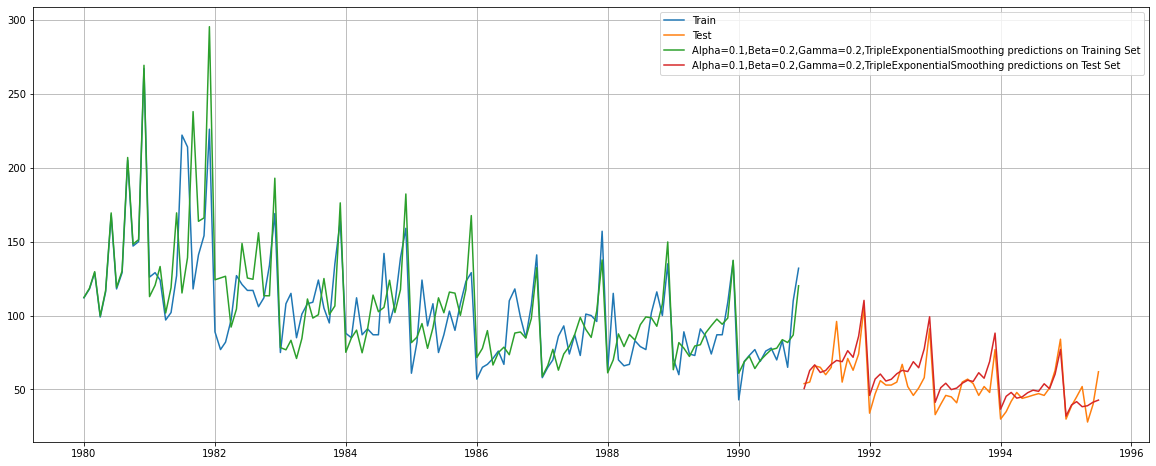

In [198]:
## Plotting on both the Training and Test data using lowest RMSE values of alpha (0.1), beta (0.2) and gamma (0.2)

plt.figure(figsize=(20,8))
plt.plot(TES_train['Rose_Sales'], label='Train')
plt.plot(TES_test['Rose_Sales'], label='Test')

plt.plot(TES_train['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()

In [199]:
resultsDf_7_2['Test RMSE'][21]

9.62801217217334

In [200]:
resultsDf_7_cons = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][21]],'Test MAPE':[resultsDf_7_2['Test MAPE'][21]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_cons])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75
"Alpha=0.1,SimpleExponentialSmoothing",36.780213,63.81
"Alpha=0.16,Beta=0.16,DoubleExponentialSmoothing",70.517385,120.07


In [201]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']))


Sorted by RMSE values on the Test Data: 
                                                     Test RMSE  Test MAPE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.628012      13.87
3pointTrailingMovingAverage                         14.125750      18.31
6pointTrailingMovingAverage                         14.554986      20.82
9pointTrailingMovingAverage                         14.721520      20.99
12pointTrailingMovingAverage                        15.232893      22.03
RegressionOnTime                                    15.255492      22.72
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...  17.310841      28.78
Alpha=0.099,SimpleExponentialSmoothing              36.748407      63.75
Alpha=0.1,SimpleExponentialSmoothing                36.780213      63.81
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       37.007705      63.89
SimpleAverageModel                                  53.413298      94.77
Alpha=0.16,Beta=0.16,DoubleExponentialSmoothing     70.517385     120.07
NaiveMode

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.1, $\beta$ = 0.2 and $\gamma$ = 0.2.

Text(0.5, 1.0, 'Plot of Exponential Smoothing Predictions and the Acutal Values')

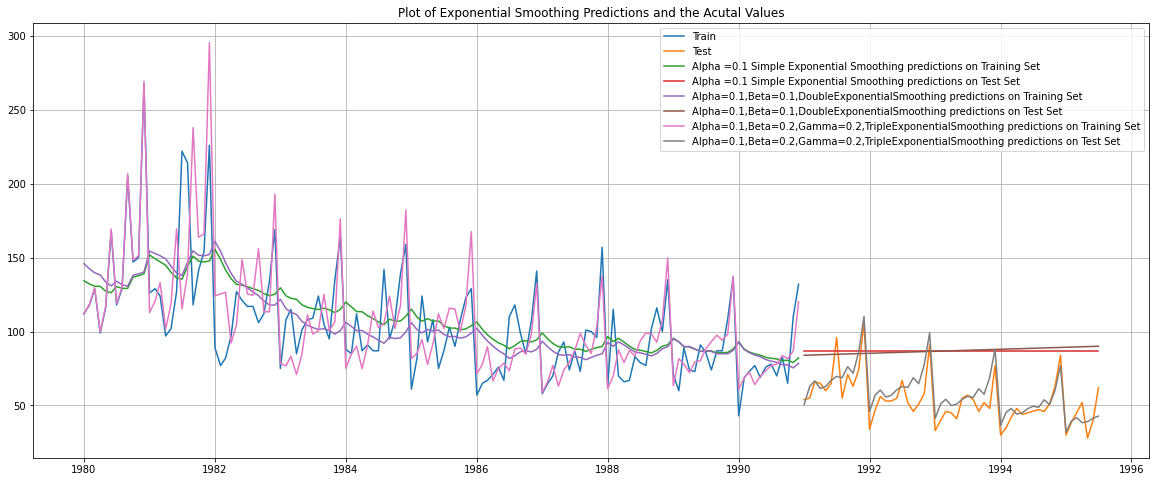

In [202]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(rose_train['Rose_Sales'], label='Train')
plt.plot(rose_test['Rose_Sales'], label='Test')

plt.plot(SES_train['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_train['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values')

<h3>5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. <br>If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. <br>Note: Stationarity should be checked at alpha = 0.05.</h3>

In [203]:
## The Augmented Dickey Fuller Test is used to assess whether or not a time series is Stationary

In [204]:
# importing the required library
from statsmodels.tsa.stattools import adfuller

In [205]:
## defining the function to apply the ADF test to the series
def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')


In [206]:
# administering the ADF test on the training data
test_stationarity(rose_train)

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



The null hypothesis is that the series is Non-Stationary. <br>
With the resultant ADF test p-value at 0.21, we cannot reject the Null Hypothesis (at alpha 0.05). We hence conclude that the series is non-stationary.

In [207]:
# In order to make the series stationary, we take a 1 period Difference of the original series. 
rose_train_d1 = rose_train.diff()


In [208]:
rose_train_d1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rose_Sales  131 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [209]:
# we now administer the ADF test on the differenced series

In [210]:
test_stationarity(rose_train_d1.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



The resultant ADF p-value is significantly less than 0.05 (alpha). We can hence reject the null hypothesis for the new series, which was derived by differencing the original series over 1 period. 

We conclude that at Difference 1, the series is stationary.

<h3>Question 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.</h3>

In [211]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [212]:
# Creating an empty Dataframe to compare ARIMA/SARIMA AIC scores
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [213]:
# importing the required library for ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [214]:
rose_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rose_Sales  132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [261]:
rose_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rose_Sales  55 non-null     float64
dtypes: float64(1)
memory usage: 880.0 bytes


In [262]:
for param in pdq:
    ARIMA_model = ARIMA(rose_train['Rose_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464574
ARIMA(0, 1, 2) - AIC:1276.8353761287594
ARIMA(0, 1, 3) - AIC:1278.0742583883402
ARIMA(0, 1, 4) - AIC:1278.8383702556725
ARIMA(1, 1, 0) - AIC:1319.3483105801893
ARIMA(1, 1, 1) - AIC:1277.7757537094708
ARIMA(1, 1, 2) - AIC:1277.359227780299
ARIMA(1, 1, 3) - AIC:1279.3126376276941
ARIMA(1, 1, 4) - AIC:1281.8924571142825
ARIMA(2, 1, 0) - AIC:1300.609261174554
ARIMA(2, 1, 1) - AIC:1279.0456894093365
ARIMA(2, 1, 2) - AIC:1279.2986939366338
ARIMA(2, 1, 3) - AIC:1281.1962260422147
ARIMA(2, 1, 4) - AIC:1282.4167927349813
ARIMA(3, 1, 0) - AIC:1299.4787391544312
ARIMA(3, 1, 1) - AIC:1279.6059663474562
ARIMA(3, 1, 2) - AIC:1280.9692448457113
ARIMA(3, 1, 3) - AIC:1273.1941150226708
ARIMA(3, 1, 4) - AIC:1274.3361219887606
ARIMA(4, 1, 0) - AIC:1298.3195533735393
ARIMA(4, 1, 1) - AIC:1281.1163245052635
ARIMA(4, 1, 2) - AIC:1283.75272786985
ARIMA(4, 1, 3) - AIC:1284.9526869788115


LinAlgError: SVD did not converge

In [263]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
18,"(3, 1, 3)",1273.194115
19,"(3, 1, 4)",1274.336122
2,"(0, 1, 2)",1276.835376
7,"(1, 1, 2)",1277.359228
6,"(1, 1, 1)",1277.775754
3,"(0, 1, 3)",1278.074258
4,"(0, 1, 4)",1278.838370
11,"(2, 1, 1)",1279.045689
12,"(2, 1, 2)",1279.298694
8,"(1, 1, 3)",1279.312638


In [215]:
arima_mod = ARIMA(rose_train['Rose_Sales'], order=(3,1,3),freq='MS')

results_Arima = arima_mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Rose_Sales   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sat, 15 Aug 2020   AIC                           1273.194
Time:                        14:26:20   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose_Sales    -0.7242      0.086     -8.398      0.000      -0.893      -0.555
ar.L2.D.Rose_Sales  

In [216]:
## Predict on the Test Set using this model and evaluate the model.

In [217]:
arima_predicted = results_Arima.forecast(steps=len(rose_test))

In [218]:
arima_predicted[0]

array([74.74983183, 75.54909117, 81.70309622, 59.7771333 , 70.37125021,
       79.15865942, 58.02382515, 68.85276465, 77.62730328, 56.55106598,
       67.41178179, 76.11746562, 55.08436158, 65.97231378, 74.60811107,
       53.61788819, 64.53274867, 73.0987937 , 52.1515218 , 63.09305241,
       71.58950438, 50.68525934, 61.65322439, 70.08024323, 49.21910028,
       60.21326471, 68.5710106 , 47.75304417, 58.77317352, 67.0618068 ,
       46.28709054, 57.33295094, 65.55263217, 44.82123894, 55.8925971 ,
       64.04348703, 43.3554889 , 54.45211213, 62.53437171, 41.88983998,
       53.01149617, 61.02528653, 40.42429171, 51.57074936, 59.51623182,
       38.95884364, 50.12987181, 58.0072079 , 37.49349531, 48.68886368,
       56.49821508, 36.02824626, 47.2477251 , 54.98925369, 34.56309604])

In [219]:
rmse_arima_1 = metrics.mean_squared_error(rose_test['Rose_Sales'],arima_predicted[0],squared=False)
print(rmse_arima_1)

15.983827172148166


In [220]:
mape_arima_1 = MAPE(rose_test['Rose_Sales'], arima_predicted[0])
print("For ARIMA (3,1,3) Model forecast on the Test Data,  MAPE is %3.2f" %mape_arima_1)

For ARIMA (3,1,3) Model forecast on the Test Data,  MAPE is 26.04


In [221]:
resultsDf_arima_1 = pd.DataFrame({'Test RMSE': [rmse_arima_1], 'Test MAPE': [mape_arima_1]}
                           ,index=['ARIMA(3,1,3)'])

resultsDf_arima_1

,Test RMSE,Test MAPE
"ARIMA(3,1,3)",15.983827,26.04


In [222]:
pre_arima_resultsDf = resultsDf.copy()

In [223]:
resultsDf = pd.concat([resultsDf, resultsDf_arima_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75
"Alpha=0.1,SimpleExponentialSmoothing",36.780213,63.81
"Alpha=0.16,Beta=0.16,DoubleExponentialSmoothing",70.517385,120.07


In [273]:
## SARIMA model, for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [274]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 3)(1, 0, 3, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)
Model: (3, 1, 3)(1, 1, 3, 12)


In [275]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [276]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rose_train['Rose_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207325
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380888
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4612.570274133063
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301649641
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014775893
SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:5573.231243129526
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385445
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753875
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3820.685517523593
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601599
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.73321826548
SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3403.7085509390954
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697555
SARIMA(0, 1, 0)x(2, 0, 2,

SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573383
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086849394
SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3632.7288792067425
SARIMA(1, 1, 0)x(3, 1, 0, 12) - AIC:727.3669084126406
SARIMA(1, 1, 0)x(3, 1, 1, 12) - AIC:728.9034690438901
SARIMA(1, 1, 0)x(3, 1, 2, 12) - AIC:721.9926145601394
SARIMA(1, 1, 0)x(3, 1, 3, 12) - AIC:3452.1633395919976
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255507
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.31727086406
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063887
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3989.294916191398
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1110.6209464400447
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:914.045384498816
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:792.3411370856668
SARIMA(1, 1, 1)x(0, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.39379650307
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135488
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428506074
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3952

SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866281929
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3510.788391885115
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:792.8940753933676
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:784.8928010053144
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:785.8335675480843
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:3602.8704648545536
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600266226
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.363925914846
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598886546358
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3766.242807995375
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:694.9386751682259
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:687.9965337210222
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:688.9098625570774
SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:3054.3451230134356
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146673
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598206
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311107963
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3428.657296529145
SARIMA(2, 1, 2)x(0, 1, 0,

SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:nan
SARIMA(3, 1, 2)x(1, 1, 0, 12) - AIC:915.605894717365
SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:917.4091459167787
SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:789.5119880945615
SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:4043.6378065765534
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3183099473655
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441222856
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1433951400645
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:6728.904131120398
SARIMA(3, 1, 2)x(2, 1, 0, 12) - AIC:786.7471041590135
SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:777.2616174107742
SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:778.7252771321741
SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:3238.101942619012
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505641108108
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462130885022
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809352004887
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:6769.786596807609
SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:687.9384843054023
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:683.21

In [277]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

,param,seasonal,AIC
445,"(3, 1, 1)","(3, 1, 1, 12)",681.362807
509,"(3, 1, 3)","(3, 1, 1, 12)",681.608652
510,"(3, 1, 3)","(3, 1, 2, 12)",681.979032
446,"(3, 1, 1)","(3, 1, 2, 12)",682.320716
477,"(3, 1, 2)","(3, 1, 1, 12)",683.211699
478,"(3, 1, 2)","(3, 1, 2, 12)",684.014199
476,"(3, 1, 2)","(3, 1, 0, 12)",687.938484
317,"(2, 1, 1)","(3, 1, 1, 12)",687.996534
349,"(2, 1, 2)","(3, 1, 1, 12)",688.248396
444,"(3, 1, 1)","(3, 1, 0, 12)",688.564227


Of the options tested, the SARIMA model with the lowest AIC is SARIMA(3,1,1)(3,1,1,12)

In [224]:
# building a SARIMA model with the paramaters above
import statsmodels.api as sm

sarima_mod = sm.tsa.statespace.SARIMAX(rose_train['Rose_Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = sarima_mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Sat, 15 Aug 2020   AIC                            681.363
Time:                                    17:27:39   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0173      0.151      0.114      0.909      -0.279       0.314
ar.L2         -0.0426      0.141   

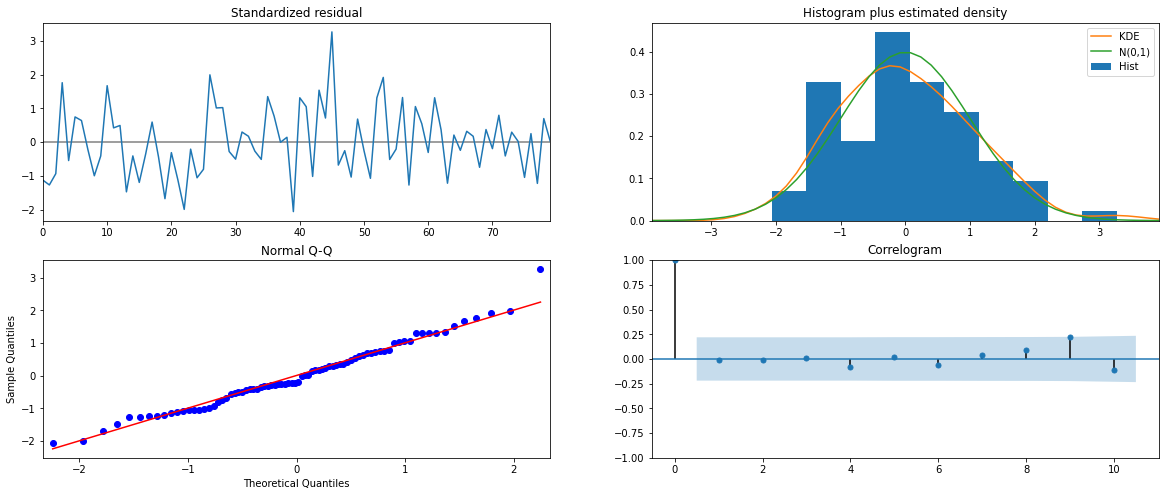

In [225]:
results_SARIMA.plot_diagnostics(figsize=(20, 8))
plt.show()

In [226]:
## Predicting on the Test Set using this model and evaluating the model.

In [227]:
sarima_pred = results_SARIMA.get_forecast(steps=len(rose_test))

In [228]:
sarima_pred.predicted_mean

array([ 45.22764112,  63.05575425,  68.1184954 ,  61.82773259,
        68.43709397,  66.05457188,  71.9218341 ,  77.96933988,
        76.26686246,  74.98481065,  96.92437277, 126.45962974,
        42.06486329,  58.56145784,  64.36420096,  56.23467108,
        64.43486854,  61.70933583,  67.6283617 ,  74.77779051,
        71.73937725,  72.76122853,  91.60142184, 122.08315107,
        37.58951934,  54.32095502,  60.14532363,  52.29781773,
        60.00437414,  57.6580289 ,  63.41253975,  70.0481023 ,
        67.53078687,  68.03198952,  87.59755562, 117.83619057,
        33.22944766,  50.04066719,  55.83462955,  48.09342812,
        55.68514932,  53.38854501,  59.12572286,  65.66599539,
        63.254874  ,  63.60756015,  83.37520692, 113.55015459,
        28.93737899,  45.74562778,  51.53585886,  43.79205067,
        51.39485885,  49.08621485,  54.8290053 ])

In [229]:
sarima_pred.summary_frame(alpha=0.05)

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,45.227641,14.458041,16.890401,73.564881
1,63.055754,14.502965,34.630464,91.481044
2,68.118495,14.453033,39.791072,96.445919
3,61.827733,14.449277,33.507670,90.147795
4,68.437094,14.469789,40.076828,96.797360
5,66.054572,14.494184,37.646493,94.462651
6,71.921834,14.519772,43.463604,100.380065
7,77.969340,14.542485,49.466592,106.472087
8,76.266862,14.564853,47.720275,104.813450
9,74.984811,14.587240,46.394346,103.575276


In [230]:
rmse_sarima_1 = metrics.mean_squared_error(rose_test['Rose_Sales'], sarima_pred.predicted_mean,squared=False)
print(rmse_sarima_1)

16.780063825621813


In [231]:
mape_sarima_1 = MAPE(rose_test['Rose_Sales'], sarima_pred.predicted_mean)
print("For SARIMA (3,1,1)(3,1,1,12) Model forecast on the Test Data,  MAPE is %3.2f" %mape_sarima_1)

For SARIMA (3,1,1)(3,1,1,12) Model forecast on the Test Data,  MAPE is 25.38


In [232]:
resultsDf_sarima_1 = pd.DataFrame({'Test RMSE': [rmse_sarima_1], 'Test MAPE': [mape_sarima_1]}
                           ,index=['SARIMA(3,1,1)(3,1,1,12)'])

resultsDf_sarima_1

,Test RMSE,Test MAPE
"SARIMA(3,1,1)(3,1,1,12)",16.780064,25.38


In [233]:
resultsDf = pd.concat([resultsDf, resultsDf_sarima_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75
"Alpha=0.1,SimpleExponentialSmoothing",36.780213,63.81
"Alpha=0.16,Beta=0.16,DoubleExponentialSmoothing",70.517385,120.07


In [234]:
resultsDf.sort_values(by='Test RMSE')

,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.628012,13.87
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
RegressionOnTime,15.255492,22.72
"ARIMA(3,1,3)",15.983827,26.04
"SARIMA(3,1,1)(3,1,1,12)",16.780064,25.38
"Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialSmoothing",17.310841,28.78
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75


<h3>7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.</h3>

In [288]:
## SARIMA with ACF and PACF values

In [289]:
# importing the required libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

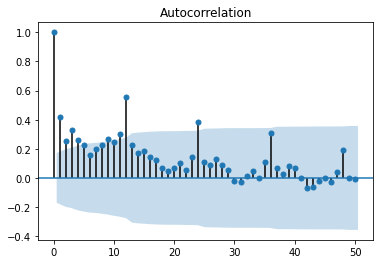

In [290]:
# ACF plot before Differencing
plot_acf(rose_train,lags=50)
plt.show()

We know that the original series is not Stationary. Hence we apply Difference over 1 period, and then plot the ACF on the new series. 

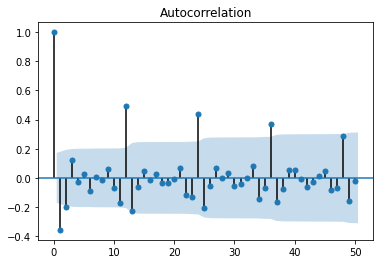

In [291]:
plot_acf(rose_train.diff().dropna(),lags=50)
plt.show()

The cut-off is right after 2, albeit on the border. Hence a possible value of q is 1/2.

In [292]:
## plotting the PACF

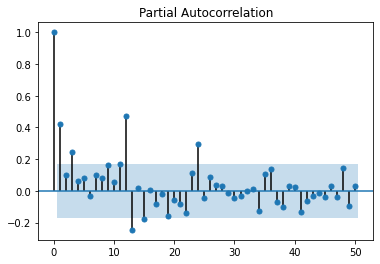

In [293]:
# PACF plot before Differencing
plot_pacf(rose_train,lags=50)
plt.show()

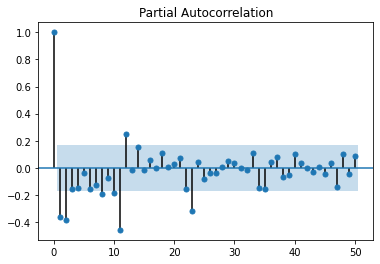

In [294]:
## PACF plot after Differencing the original series over 1 period
plot_pacf(rose_train.diff().dropna(),lags=50)
plt.show()

The cut-off is right after 2. Hence a possible value of p is 2.

Based on the ACF and PACF plots, we can assign the following values:<br>
p = 2 (based on the PACF plot)<br>
d = 1 (first order of differencing)<br>
q = 2 (based on the ACF plot)<br>
Because seasonality is evident, P and Q are accorded 1. 

In [235]:
mod_SAP1 = sm.tsa.statespace.SARIMAX(rose_train['Rose_Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_SAP1 = mod_SAP1.fit(maxiter=1000)
print(results_SARIMA_SAP1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -450.847
Date:                              Sat, 15 Aug 2020   AIC                            915.693
Time:                                      17:30:31   BIC                            934.204
Sample:                                           0   HQIC                           923.192
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1035      0.133      8.288      0.000       0.843       1.364
ar.L2         -0.34

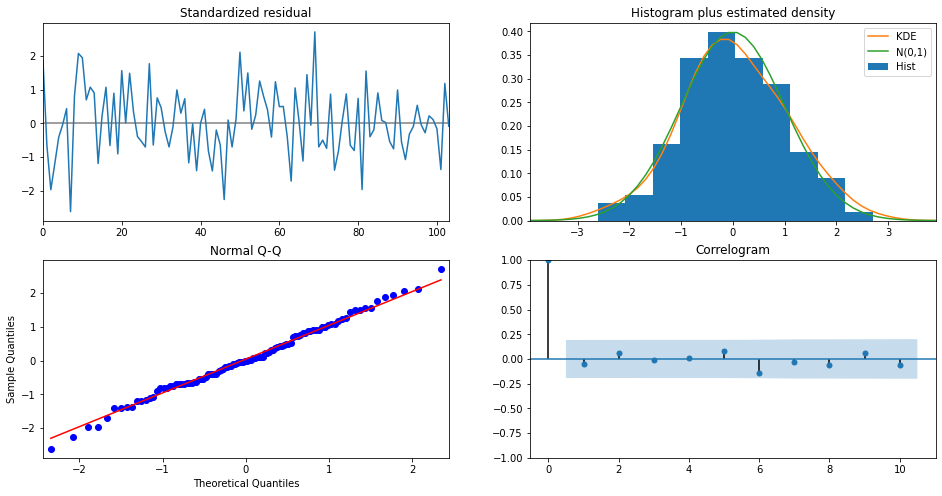

In [236]:
results_SARIMA_SAP1.plot_diagnostics(figsize=(16, 8))
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [237]:
pred_SAP1 = results_SARIMA_SAP1.get_forecast(steps=len(rose_test))
pred_SAP1.predicted_mean

array([ 47.57188164,  56.92694054,  69.43217305,  64.92635867,
        60.37028492,  72.46040379,  71.40240776,  61.95639812,
        75.44640119,  66.34017126,  99.26729113, 124.39750887,
        36.52403978,  52.45520048,  61.70796017,  60.50672913,
        54.60794934,  64.71395464,  64.8321605 ,  55.94017098,
        69.23616846,  56.67983111,  94.28627142, 118.20258359,
        31.66471721,  45.04653199,  55.56027986,  53.07801485,
        47.69982283,  58.57505438,  58.23729331,  49.13053234,
        62.50174459,  51.28293183,  87.07531164, 111.46222523,
        24.40657716,  38.77671171,  48.80160447,  46.81596542,
        41.23595395,  51.81297493,  51.65198128,  42.62848204,
        55.97053534,  44.23319641,  80.72884393, 104.93331665,
        18.07840011,  32.06538681,  42.27979696,  40.10162795,
        34.59985704,  45.2924871 ,  45.06296496])

In [238]:
pred_SAP1.summary_frame(alpha=0.05)

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,47.571882,18.391881,11.524456,83.619307
1,56.926941,19.140788,19.411685,94.442196
2,69.432173,19.146804,31.905128,106.959218
3,64.926359,19.149872,27.393300,102.459418
4,60.370285,19.154181,22.828781,97.911789
5,72.460404,19.214043,34.801572,110.119236
6,71.402408,19.373709,33.430636,109.374180
7,61.956398,19.630965,23.480414,100.432383
8,75.446401,19.956877,36.331641,114.561161
9,66.340171,20.320048,26.513609,106.166734


In [239]:
rmse_SAP1 = metrics.mean_squared_error(rose_test['Rose_Sales'],pred_SAP1.predicted_mean,squared=False)
print(rmse_SAP1)

13.275387227573296


In [240]:
mape_SAP1 = MAPE(rose_test['Rose_Sales'], pred_SAP1.predicted_mean)
print("For SARIMA (2,1,2)(1,1,1,12) Model forecast on the Test Data,  MAPE is %3.2f" %mape_SAP1)

For SARIMA (2,1,2)(1,1,1,12) Model forecast on the Test Data,  MAPE is 17.53


In [241]:
resultsDf_sarima_2 = pd.DataFrame({'Test RMSE': [rmse_SAP1], 'Test MAPE': [mape_SAP1]}
                           ,index=['SARIMA(2,1,2)(1,1,1,12)'])

resultsDf_sarima_2

,Test RMSE,Test MAPE
"SARIMA(2,1,2)(1,1,1,12)",13.275387,17.53


In [242]:
resultsDf = pd.concat([resultsDf, resultsDf_sarima_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.255492,22.72
NaiveModel,79.672475,144.91
SimpleAverageModel,53.413298,94.77
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
"Alpha=0.099,SimpleExponentialSmoothing",36.748407,63.75
"Alpha=0.1,SimpleExponentialSmoothing",36.780213,63.81
"Alpha=0.16,Beta=0.16,DoubleExponentialSmoothing",70.517385,120.07


<h3>Question 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.</h3>

In [243]:
resultsDf.sort_values(by='Test RMSE')

,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.628012,13.87
"SARIMA(2,1,2)(1,1,1,12)",13.275387,17.53
3pointTrailingMovingAverage,14.125750,18.31
6pointTrailingMovingAverage,14.554986,20.82
9pointTrailingMovingAverage,14.721520,20.99
12pointTrailingMovingAverage,15.232893,22.03
RegressionOnTime,15.255492,22.72
"ARIMA(3,1,3)",15.983827,26.04
"SARIMA(3,1,1)(3,1,1,12)",16.780064,25.38
"Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialSmoothing",17.310841,28.78


<h3>Question 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.</h3>

Building a Triple Exponential Smoothing (alpha = 0.1, beta = 0.2, gamma = 0.2) model on the complete data, and forecasting for the next 12 months

In [365]:
TES_data = rose_data.copy()

In [366]:
TES_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rose_Sales  187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [367]:
model_TES_best = ExponentialSmoothing(TES_data['Rose_Sales'],trend='additive',seasonal='multiplicative')

In [368]:
TES_best = model_TES_best.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)

In [369]:
print(TES_best.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                          81513.448
Optimized:                         True   AIC                           1168.477
Trend:                         Additive   BIC                           1220.174
Seasonal:                Multiplicative   AICC                          1172.548
Seasonal Periods:                    12   Date:                 Fri, 14 Aug 2020
Box-Cox:                          False   Time:                         23:51:34
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_slope          

In [370]:
## Forecast
TES_best_forecast = TES_best.forecast(steps=12)

In [371]:
TES_best_forecast

1995-08-01    47.552982
1995-09-01    48.746129
1995-10-01    50.277107
1995-11-01    58.269327
1995-12-01    82.302948
1996-01-01    31.700169
1996-02-01    39.432145
1996-03-01    45.380415
1996-04-01    46.712150
1996-05-01    40.645794
1996-06-01    47.201480
1996-07-01    53.867965
Freq: MS, dtype: float64

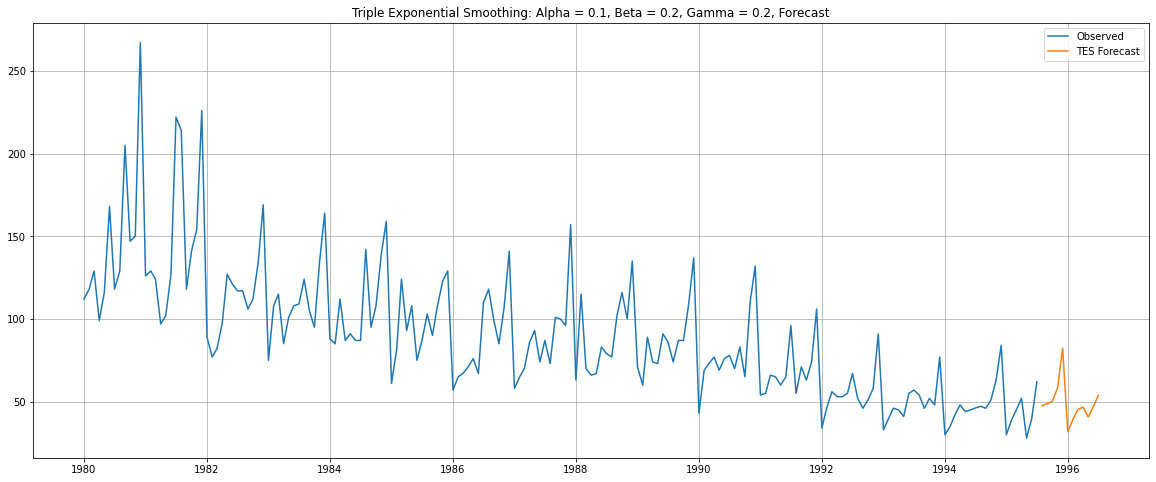

In [372]:
## Plotting on observed data and the forecast

plt.figure(figsize=(20,8))
plt.plot(TES_data['Rose_Sales'], label='Observed')

plt.plot(TES_best_forecast, label='TES Forecast')

plt.title('Triple Exponential Smoothing: Alpha = 0.1, Beta = 0.2, Gamma = 0.2, Forecast')
plt.legend(loc='best')
plt.grid();

In [359]:
mod = sm.tsa.statespace.SARIMAX(rose_data['Rose_Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -665.294
Date:                              Fri, 14 Aug 2020   AIC                           1344.588
Time:                                      23:45:34   BIC                           1366.070
Sample:                                           0   HQIC                          1353.312
                                              - 187                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1081      0.093     11.951      0.000       0.926       1.290
ar.L2         -0.32

In [360]:
pred_full_SARIMA = results_SARIMA.get_forecast(steps=12)

In [361]:
pred_full_SARIMA_date = pd.DataFrame(pred_full_SARIMA.summary_frame())
pred_full_SARIMA_date.head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,54.545303,15.839478,23.500497,85.590110
1,47.917716,16.446711,15.682754,80.152677
2,52.623395,16.455915,20.370395,84.876396
3,57.646815,16.455942,25.393762,89.899869
4,82.776318,16.466521,50.502530,115.050107


In [362]:
pred_full_SARIMA_date = pred_full_SARIMA_date.set_index(pd.date_range(start='1995-08-01',end='1996-07-01', freq='MS'))

In [363]:
pred_full_SARIMA_date

y,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,54.545303,15.839478,23.500497,85.590110
1995-09-01,47.917716,16.446711,15.682754,80.152677
1995-10-01,52.623395,16.455915,20.370395,84.876396
1995-11-01,57.646815,16.455942,25.393762,89.899869
1995-12-01,82.776318,16.466521,50.502530,115.050107
1996-01-01,31.838413,16.531662,-0.563049,64.239874
1996-02-01,39.287620,16.682039,6.591425,71.983816
1996-03-01,45.878564,16.915626,12.724547,79.032581
1996-04-01,52.236236,17.211730,18.501865,85.970606
1996-05-01,37.623006,17.546784,3.231942,72.014070


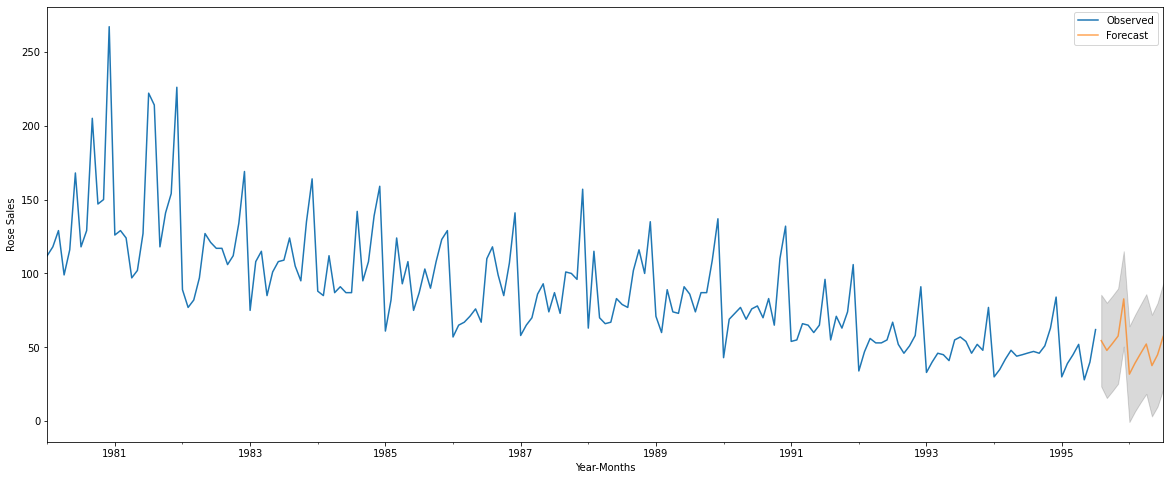

In [364]:
# plot the forecast along with the confidence band
plt.figure(figsize=(20,8))
axis = rose_data['Rose_Sales'].plot(label='Observed')
pred_full_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'], 
                  pred_full_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.show()